In [1]:
from utils.simple_ar_univariate import *
from utils.simple_ar_multivariate import *
from utils.adaptive_ar_univariate import *
from utils.mh_univariate import *
from utils.mh_multivariate import *
from utils.plotting_functions import *
from utils.distributions import *
from utils.compeff_functions import *
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from line_profiler import LineProfiler
import time
import pandas as pd
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Simple acceptance-rejection sampling in univariate setting

### Logistic proposal function and gamma distribution as target function

Acceptance probability: 0.8488400597241103


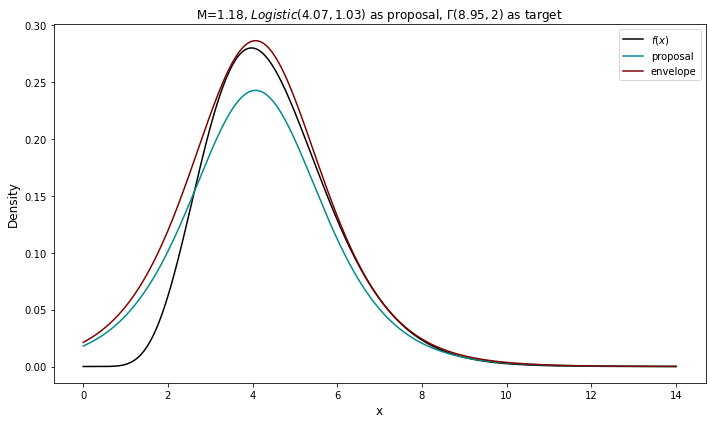

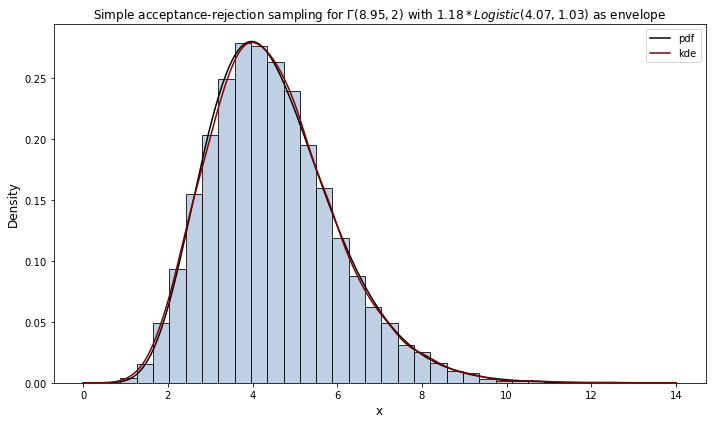

In [2]:
np.random.seed(2020)
N = 10000 # Number of draws
a = 8.95 # Parameter in gamma distribution
beta = 2 # Parameter in gamma distribution
M = 1.18 # Mulitplicative factor in envelope
loc = 4.07 # Location parameter in logistic distribution
scale = 1.03 # Scale parameter in logistic distribution

target = Gamma(a, beta)
proposal = Logistic(loc, scale)

# Plot proposal, envelope, and target
x_plot = np.linspace(0, 14, 1000) # Plotting range
title = f'M={M}, $Logistic({loc},{scale})$ as proposal, $\Gamma({a},{beta})$ as target'
fig = envelope_plot(x_plot, M, target, proposal, title)

# Simple accept-reject Sampling
samples, accept_prob = simple_accept_reject_univariate(N, M, target, proposal) 

# Get pdf and kde plot
x_plot = np.linspace(0, 14, 1000) # Plotting range
title = f'Simple acceptance-rejection sampling for $\Gamma({a},{beta})$ with ${M}*Logistic({loc},{scale})$ as envelope'
fig = pdf_kde_plot(samples, x_plot, target, title)

print("Acceptance probability:", accept_prob)

# lp = LineProfiler()
# lp_wrapper = lp(naive_simple_accept_reject_univariate)
# lp_wrapper(N, M, target, proposal)
# lp.print_stats()

### Cauchy proposal function and unnormalized fat-tailed distribution as target function

Acceptance probability: 0.3499281359964316


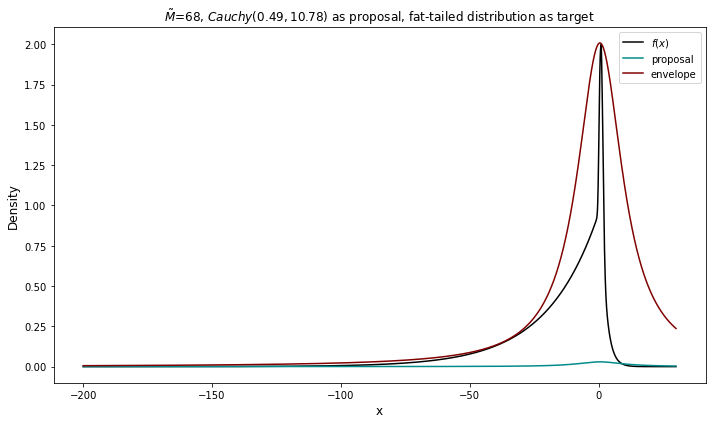

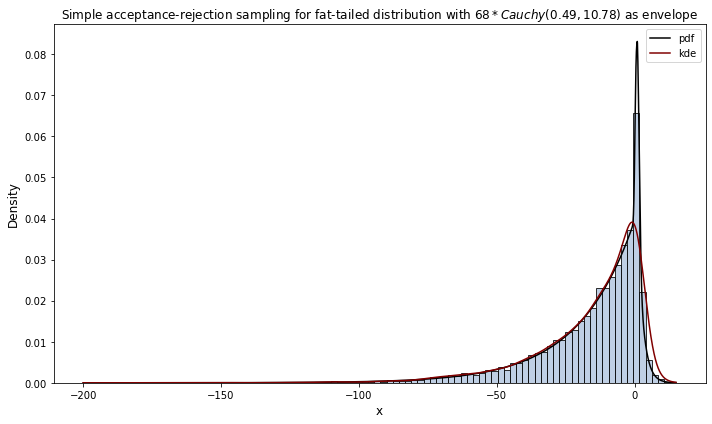

In [3]:
np.random.seed(2020)
N = 10000 # Number of draws
M = 68 # Mulitplicative factor in envelope
loc = 0.49 # Location parameter in Cauchy distribution
scale = 10.78 # Scale parameter in Cauchy distribution
bins = 90
M_string = 'M'

target = fat_tailed_distribution_unnormalized()
proposal = Cauchy(loc, scale)

# Plot proposal, envelope, and target
x_plot = np.linspace(-200, 30, 4000) # Plotting range
title = fr'$\tilde{M_string}$={M}, $Cauchy({loc},{scale})$ as proposal, fat-tailed distribution as target'
fig = envelope_plot(x_plot, M, target, proposal, title)

# Simple accept-reject Sampling
no_samples = math.ceil(N * ((1 / (M * target.norm_const()) + 0.05) * 10)) # Number of excess samples based on theoretical rejection frequency. Added for vectorization
no_samples = 1600
samples, accept_prob = simple_accept_reject_univariate(N, M, target, proposal) 

# Get pdf and kde plot
target = fat_tailed_distribution()
x_plot = np.linspace(-200, 15, 4000) # Plotting range
title = f'Simple acceptance-rejection sampling for fat-tailed distribution with ${M}*Cauchy({loc},{scale})$ as envelope'
fig = pdf_kde_plot(samples, x_plot, target, title, bins)

print("Acceptance probability:", accept_prob)

# target = fat_tailed_distribution_unnormalized()
# lp = LineProfiler()
# lp_wrapper = lp(simple_accept_reject_univariate)
# lp_wrapper(N, M, target, proposal, no_samples)
# lp.print_stats()

### Normal proposal density and unnormalized bimodal distribution as target density

Acceptance probability: 0.35387624730730183


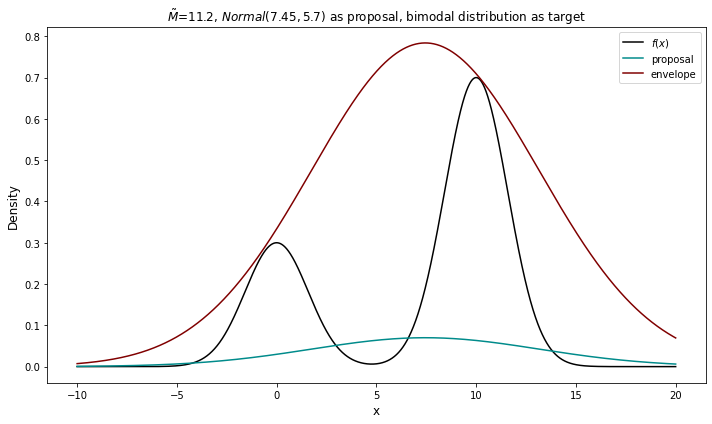

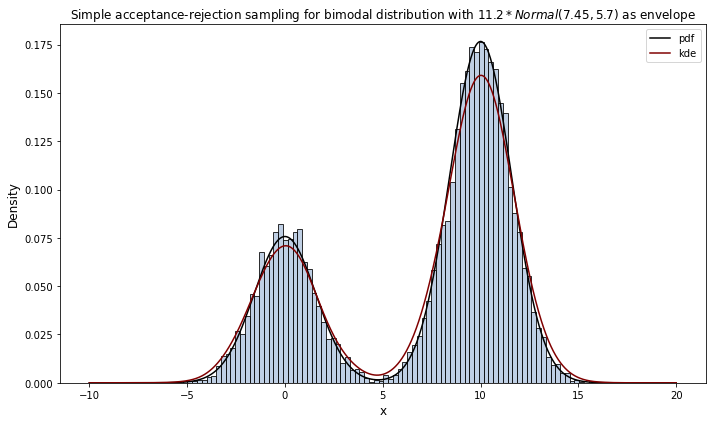

In [4]:
N = 10000 # Number of draws
M = 11.2 # Mulitplicative factor in envelope
loc = 7.45 # Mean in normal distribution
scale = 5.7 # Std dev in normal distribution
bins = 90
M_string = 'M'

target = unnormalized_bimodal_distribution()
proposal = Normal(loc,scale)

# Plot proposal, envelope, and target
x_plot = np.linspace(-10, 20, 4000) # Plotting range
title = fr'$\tilde{M_string}$={M}, $Normal({loc},{scale})$ as proposal, bimodal distribution as target'
fig = envelope_plot(x_plot, M, target, proposal, title)

# Simple accept-reject Sampling
no_samples = math.ceil(N * ((1 / (M * target.norm_const()) + 0.05) * 10)) # Number of excess samples based on theoretical rejection frequency. Added for vectorization
samples, accept_prob = simple_accept_reject_univariate(N, M, target, proposal) 

# Get pdf and kde plot
target = normalized_bimodal_distribution()
x_plot = np.linspace(-10, 20, 4000) # Plotting range
title = f'Simple acceptance-rejection sampling for bimodal distribution with ${M}*Normal({loc},{scale})$ as envelope'
fig = pdf_kde_plot(samples, x_plot, target, title, bins)

print("Acceptance probability:", accept_prob)

# target = unnormalized_bimodal_distribution()
# lp = LineProfiler()
# lp_wrapper = lp(simple_accept_reject_univariate)
# lp_wrapper(N, M, target, proposal, no_samples)
# lp.print_stats()

### Normal proposal density and unnormalized multimodal distribution as target density

Acceptance probability: 0.7601649027811962


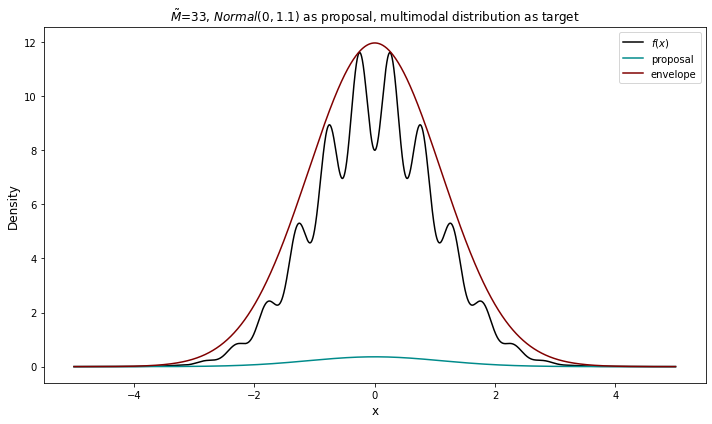

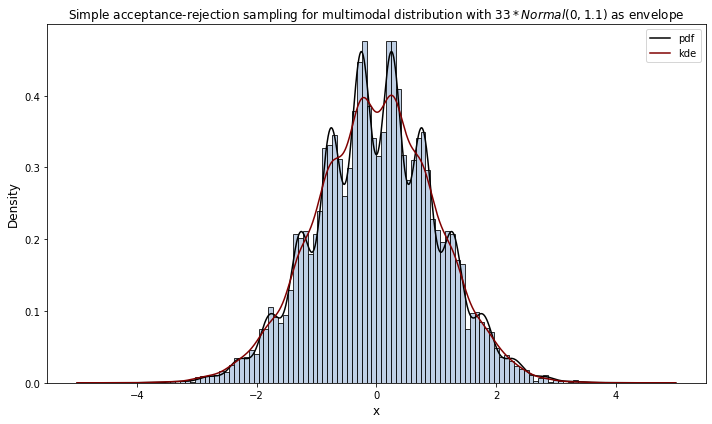

In [5]:
np.random.seed(2020)
N = 10000 # Number of draws
M = 33 # Mulitplicative factor in envelope
loc = 0 # Mean in normal distribution
scale = 1.1 # Std dev in normal distribution
bins = 90
M_string = 'M'

target = unnormalized_multimodal_distribution()
proposal = Normal(loc,scale)

# Plot proposal, envelope, and target
x_plot = np.linspace(-5, 5, 4000) # Plotting range
title = fr'$\tilde{M_string}$={M}, $Normal({loc},{scale})$ as proposal, multimodal distribution as target'
fig = envelope_plot(x_plot, M, target, proposal, title)

# Simple accept-reject Sampling
no_samples = math.ceil(N * ((1 / (M * target.norm_const()) + 0.05) * 10)) # Number of excess samples based on theoretical rejection frequency. Added for vectorization
samples, accept_prob = simple_accept_reject_univariate(N, M, target, proposal) 

# Get pdf and kde plot
target = normalized_multimodal_distribution()
x_plot = np.linspace(-5, 5, 4000) # Plotting range
title = f'Simple acceptance-rejection sampling for multimodal distribution with ${M}*Normal({loc},{scale})$ as envelope'
fig = pdf_kde_plot(samples, x_plot, target, title, bins)

print("Acceptance probability:", accept_prob)

# Adaptive Rejection Sampling in univariate setting

### Example of Adaptive Rejection Sampling with std normal as target distribution

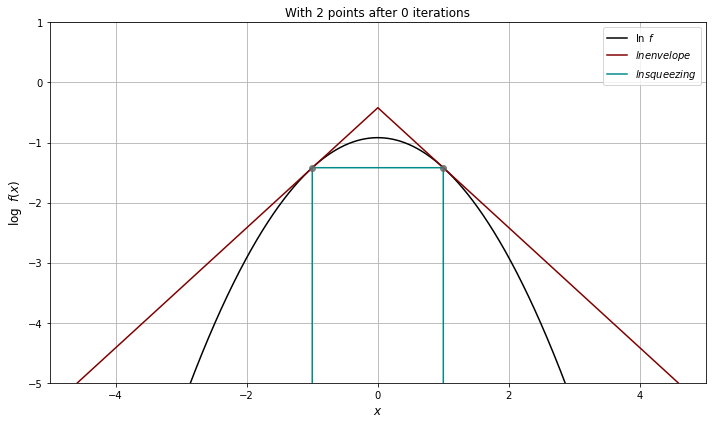

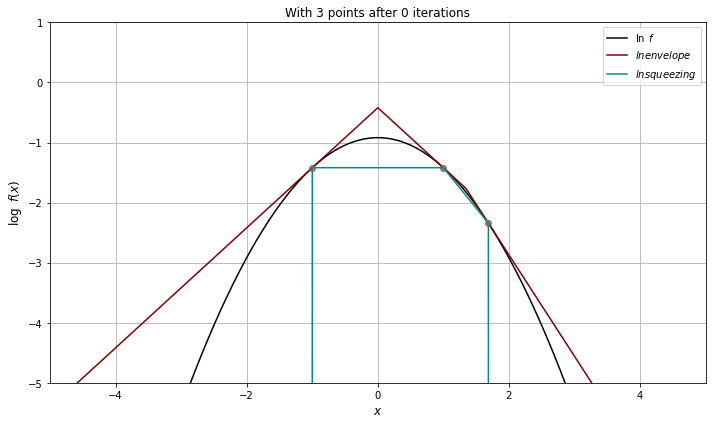

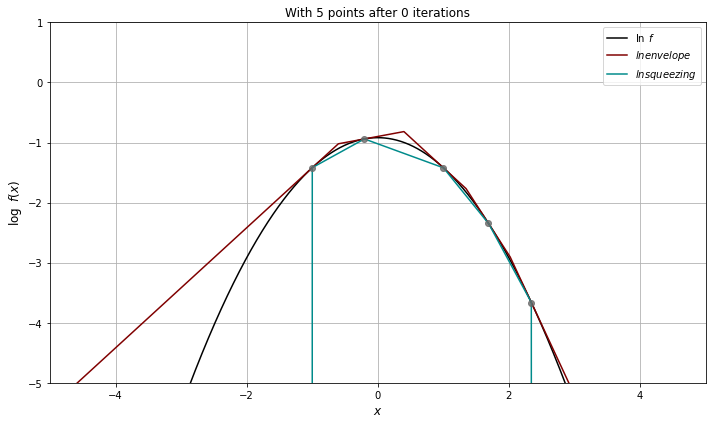

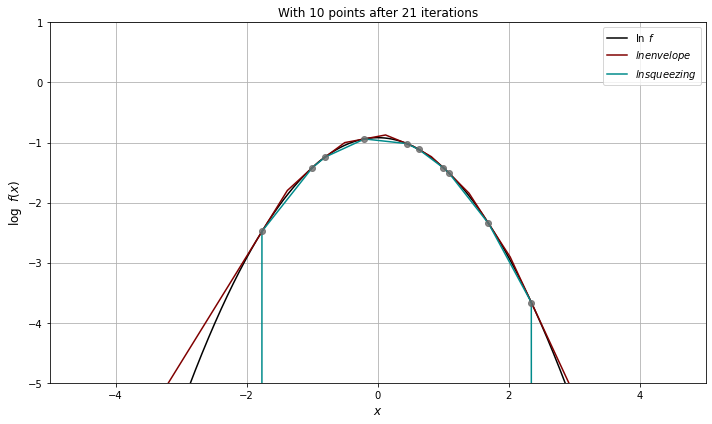

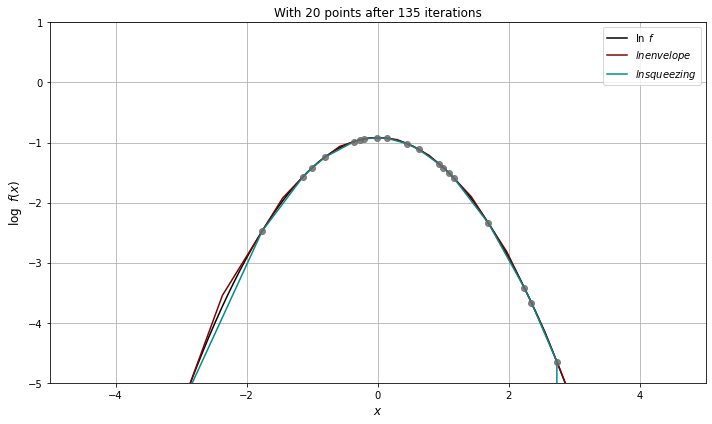

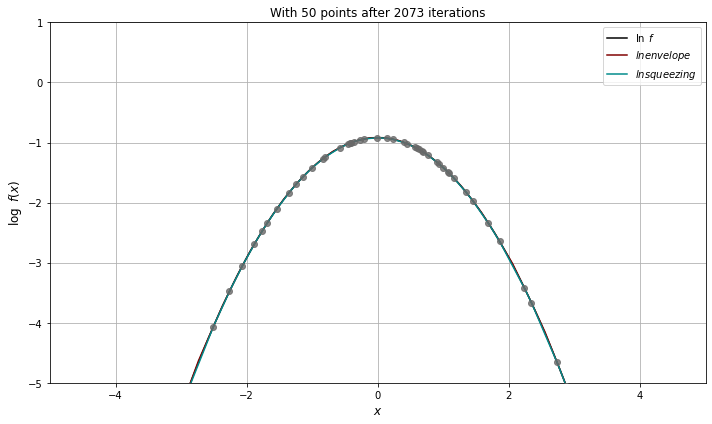

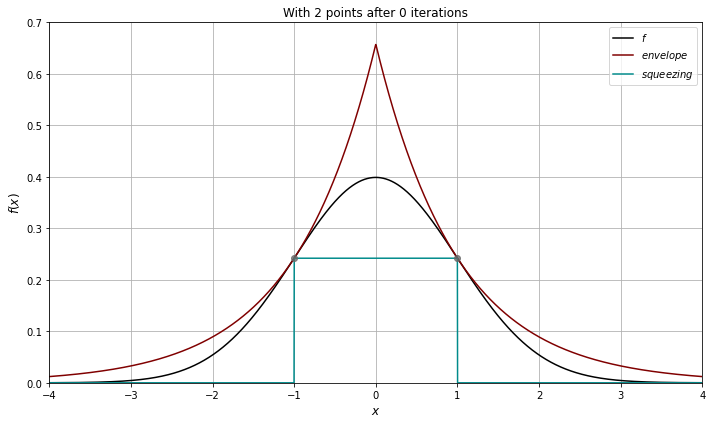

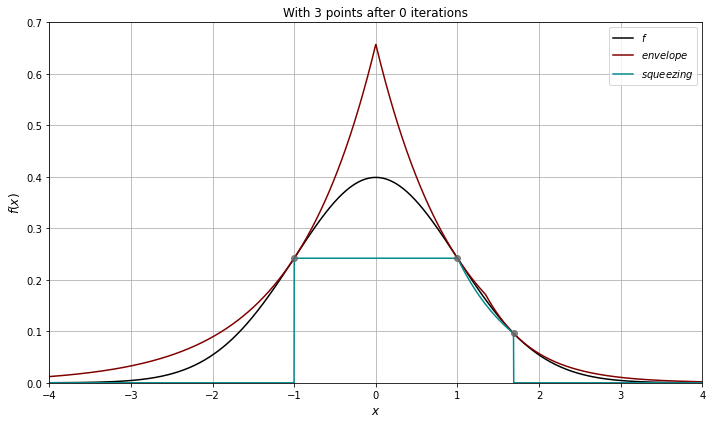

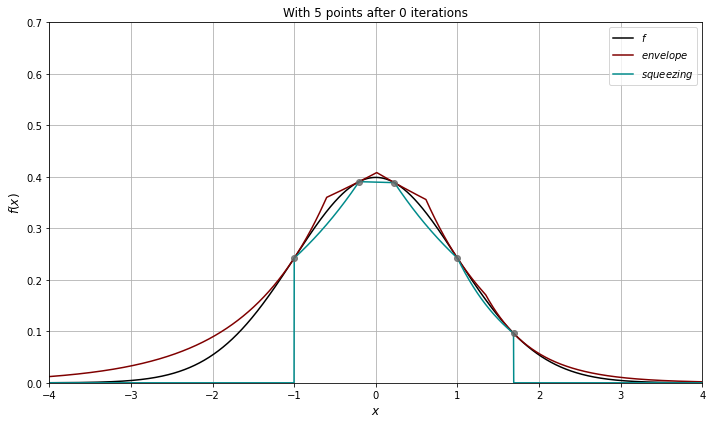

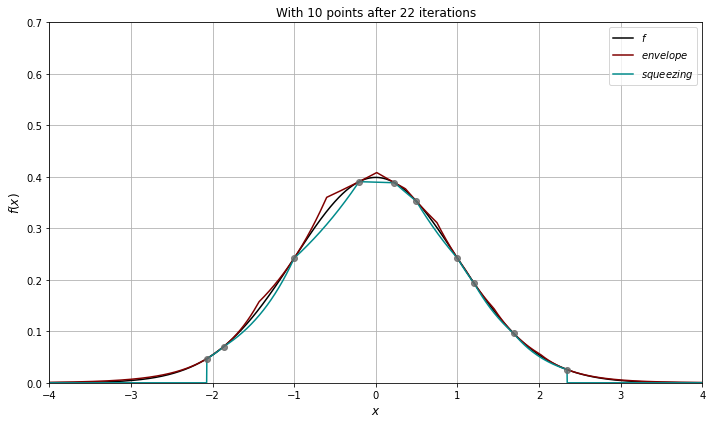

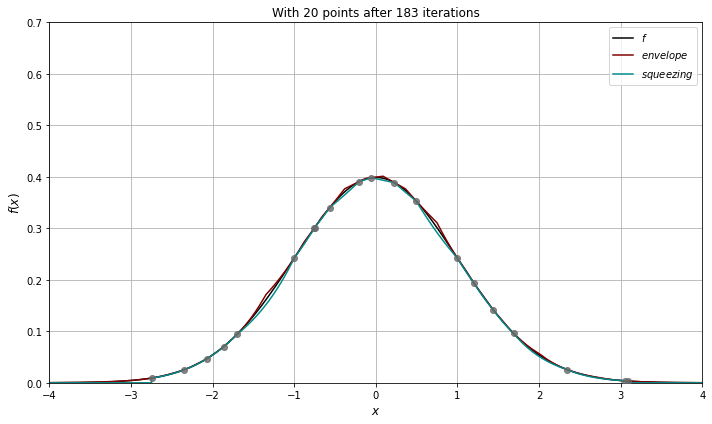

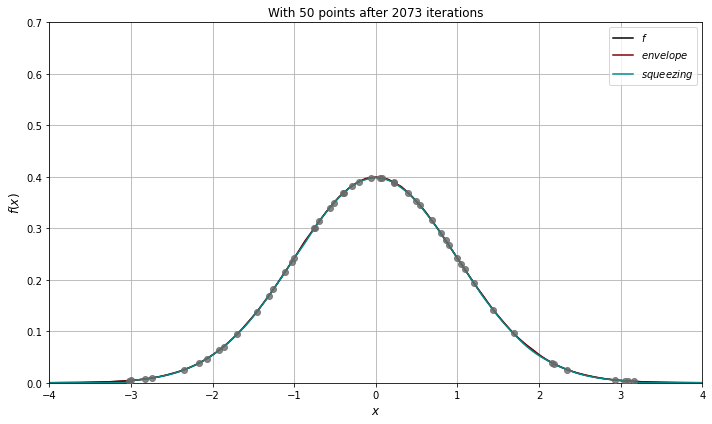

In [6]:
np.random.seed(2020)
mean = 0. # Mean in std normal
variance = 1. # Variance in std normal
N = 10000 # Number of draws
T_k = np.array([-1., 1.]) # Initial abscissae
z_limits = [float('-inf'), float('inf')] # Bounds in set for intersection points

# Define how to compute h(x) and h'(x) using unnormalized target
log_prob = log_norm_normal(mean, variance)

# Plot adaptive envelope and squeezing funtion on log-space and untransformed space
x_plot = np.linspace(-5, 5, 4000) # Plotting range
x_lim = [-5, 5] # Plotting limits
y_lim = [-5, 1] # Plotting limits
samples, accept_prob = adaptive_rejection_sampling_plotting(N=N, x_plot=x_plot, x_lim=x_lim, y_lim=y_lim, log_prob=log_prob, 
                                                                           xs=T_k, z_limits=z_limits, plot='linear')
np.random.seed(2020)
x_lim = [-4, 4] # Plotting limits
y_lim = [0, 0.7] # Plotting limits
samples, accept_prob = adaptive_rejection_sampling_plotting(N=N, x_plot=x_plot, x_lim=x_lim, y_lim=y_lim, log_prob=log_prob, 
                                                                           xs=T_k, z_limits=z_limits, plot='exp')

### Adaptive Rejection Sampling with Gamma distribution as target using unnormalized target density 

Acceptance probability: 0.9983028850953379


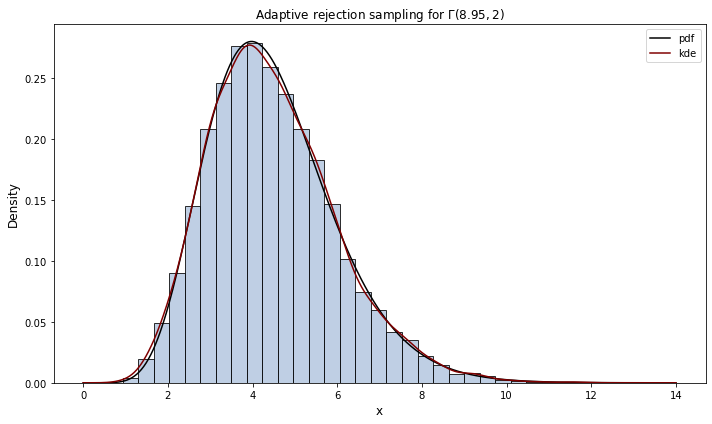

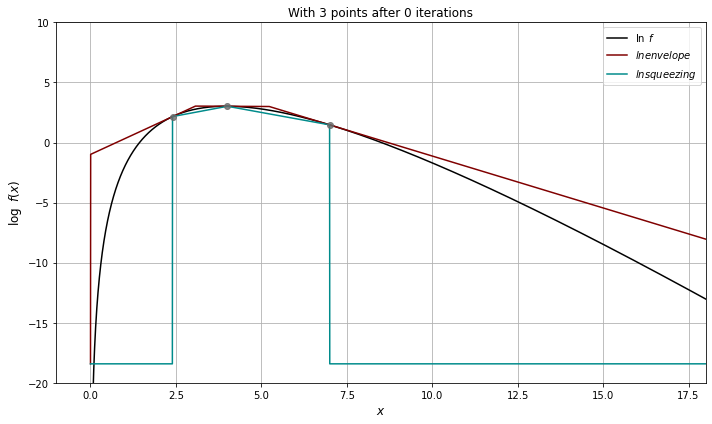

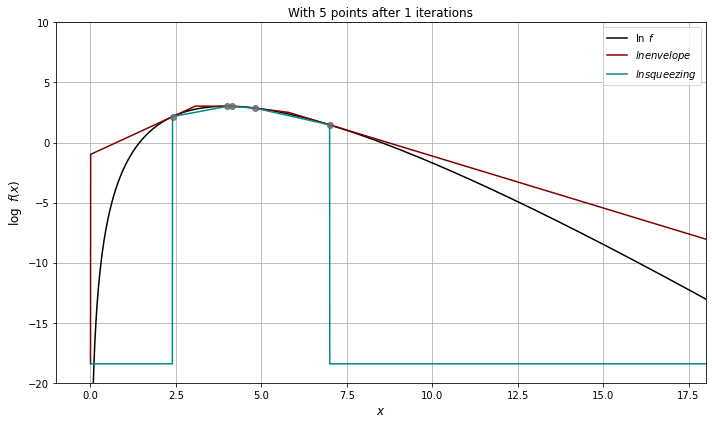

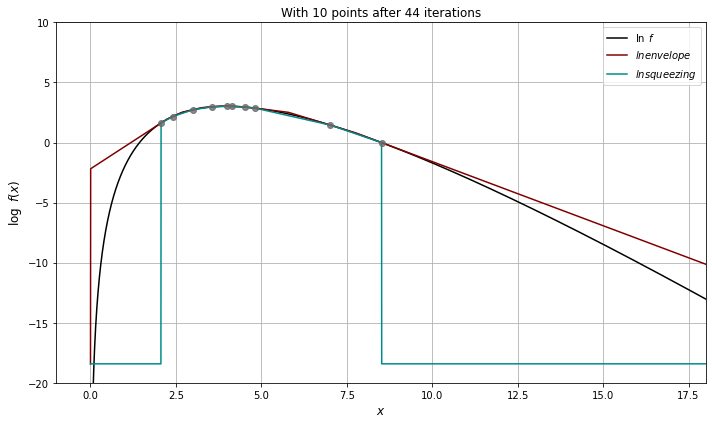

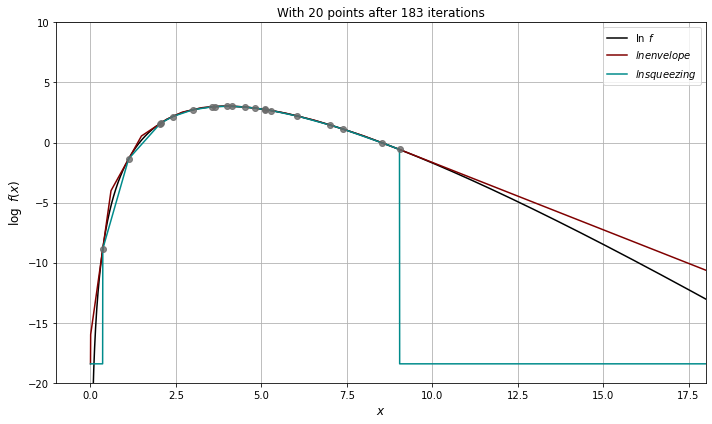

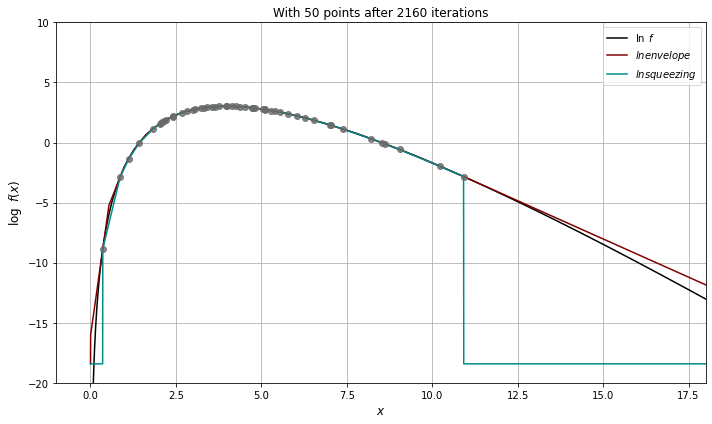

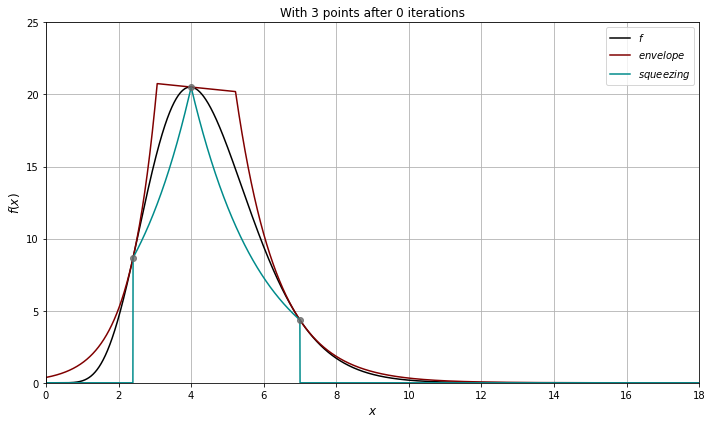

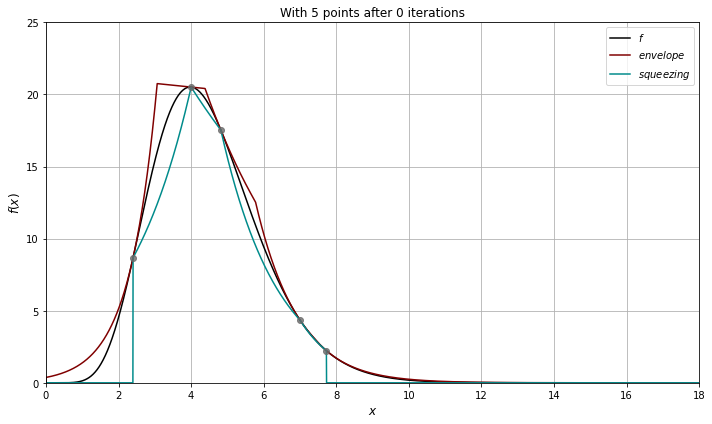

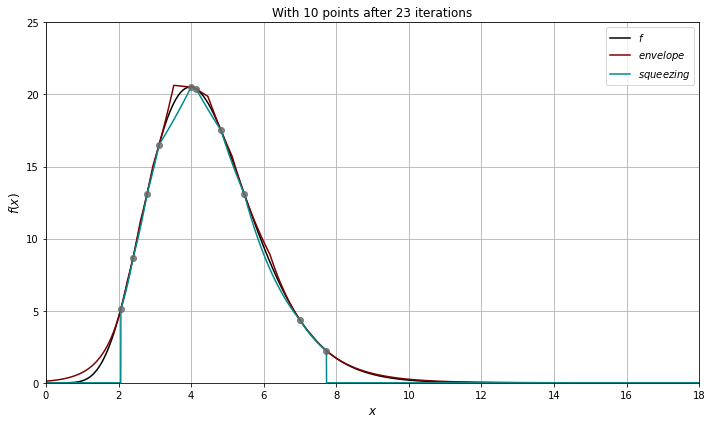

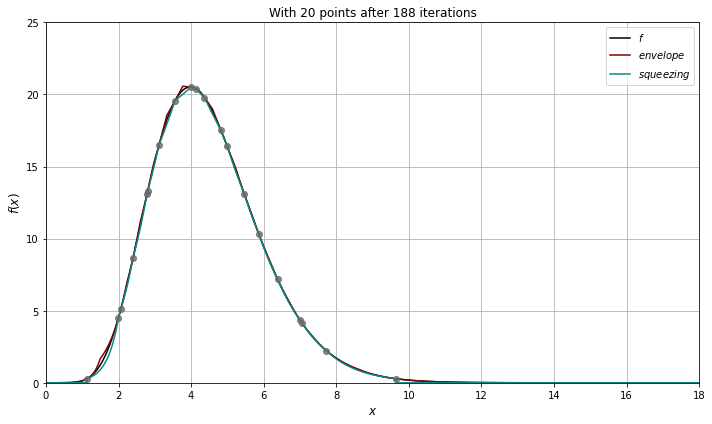

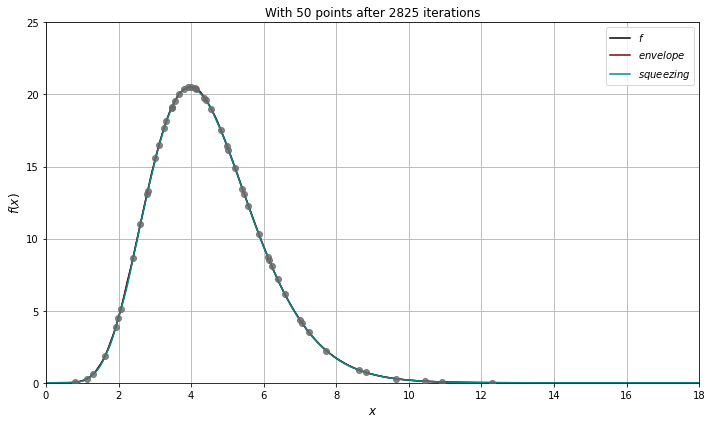

Acceptance probability: 0.9971083856815236


In [8]:
np.random.seed(2020)
N = 10000 # Number of draws
a = 8.95 # Parameter in gamma distribution
beta = 2 # Parameter in gamma distribution
theta = 0.5 # 1/beta
T_k = np.array([2.4, 4., 7.])
z_limits = [0., float('inf')] # Bounds in set for intersection points

target = Gamma(a, beta)

# Define how to compute h(x) and h'(x)
log_prob = log_unnorm_gamma(a, theta)

# Adaptive Rejection sampling
samples, accept_prob = naive_adaptive_rejection_sampling(N=N, log_prob=log_prob, xs=T_k, z_limits=z_limits)
print("Acceptance probability:", accept_prob)
# Get pdf and kde plot
x_plot = np.linspace(0, 14, 1000) # Plotting range
title = f'Adaptive rejection sampling for $\Gamma({a},{beta})$'
fig = pdf_kde_plot(samples, x_plot, target, title)

# Plot adaptive envelope and squeezing funtion on log-space and untransformed space
x_plot = np.linspace(0, 20, 4000) # Plotting range
x_lim = [-1, 18] # Plotting limits
y_lim = [-20, 10] # Plotting limits
np.random.seed(2020)
samples, accept_prob = adaptive_rejection_sampling_plotting(N=N, x_plot=x_plot, x_lim=x_lim, y_lim=y_lim, log_prob=log_prob,
                                                                           xs=T_k, z_limits=z_limits, plot='linear')
np.random.seed(2020)
x_lim = [0, 18] # Plotting limits
y_lim = [0, 25] # Plotting limits
samples, accept_prob = adaptive_rejection_sampling_plotting(N=N, x_plot=x_plot, x_lim=x_lim, y_lim=y_lim, log_prob=log_prob,
                                                                           xs=T_k, z_limits=z_limits, plot='exp')
print("Acceptance probability:", accept_prob)

# lp = LineProfiler()
# lp_wrapper = lp(naive_adaptive_rejection_sampling)
# lp_wrapper(N=N, log_prob=log_prob, xs=T_k, z_limits=z_limits)
# lp.print_stats()

### Fixed "Adaptive" Rejection Sampling with Gamma distribution as target using unnormalized target density 

Acceptance probability: 0.9693679720822024


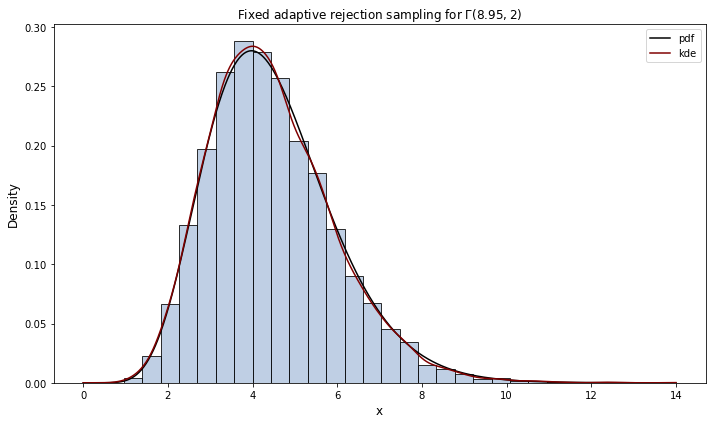

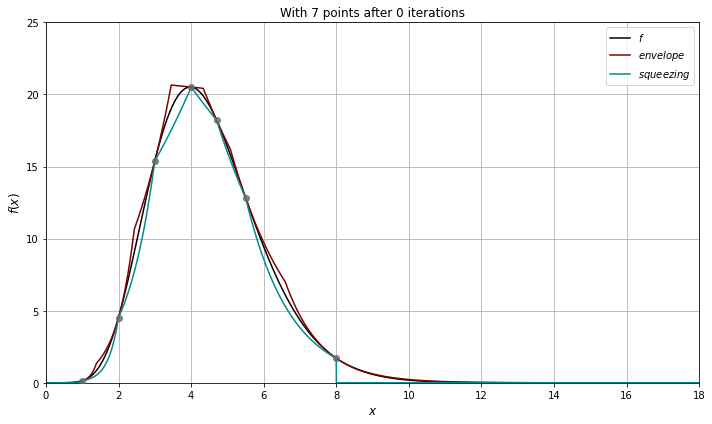

In [10]:
np.random.seed(2020)
N = 10000 # Number of draws
a = 8.95 # Parameter in gamma distribution
beta = 2 # Parameter in gamma distribution
theta = 0.5 # 1/beta
T_k = np.array([1., 2., 3., 4., 4.7, 5.5, 8.]) # Initial abscissae
z_limits = [0., float('inf')] # Bounds in set for intersection points

target = Gamma(a, beta)

# Define how to compute h(x) and h'(x)
log_prob = log_unnorm_gamma(a, theta)

# Fixed "Adaptive" Rejection Sampling
# samples, accept_prob, xs, hs, dhdxs = fixed_adaptive_rejection_sampling(N=N, log_prob=log_prob, xs=T_k, z_limits=z_limits)
samples, accept_prob = naive_fixed_adaptive_rejection_sampling(N=N, log_prob=log_prob, xs=T_k, z_limits=z_limits)
print("Acceptance probability:", accept_prob)
# Get pdf and kde plot
x_plot = np.linspace(0, 14, 1000) # Plotting range
title = f'Fixed adaptive rejection sampling for $\Gamma({a},{beta})$'
fig = pdf_kde_plot(samples, x_plot, target, title)

# Plot adaptive envelope and squeezing funtion on untransformed space
x_plot = np.linspace(0, 20, 4000) # Plotting range
np.random.seed(2020)
x_lim = [0, 18] # Plotting limits
y_lim = [0, 25] # Plotting limits
samples, accept_prob = adaptive_rejection_sampling_plotting(N=N, x_plot=x_plot, x_lim=x_lim, y_lim=y_lim, log_prob=log_prob,
                                                                           xs=T_k, z_limits=z_limits, plot='exp', fixed=True)

# lp = LineProfiler()
# lp_wrapper = lp(fixed_adaptive_rejection_sampling)
# lp_wrapper(N=N, log_prob=log_prob, xs=T_k, z_limits=z_limits)
# lp.print_stats()

### Adaptive Rejection Metropolis Sampling with unnormalized fat-tailed target distribution

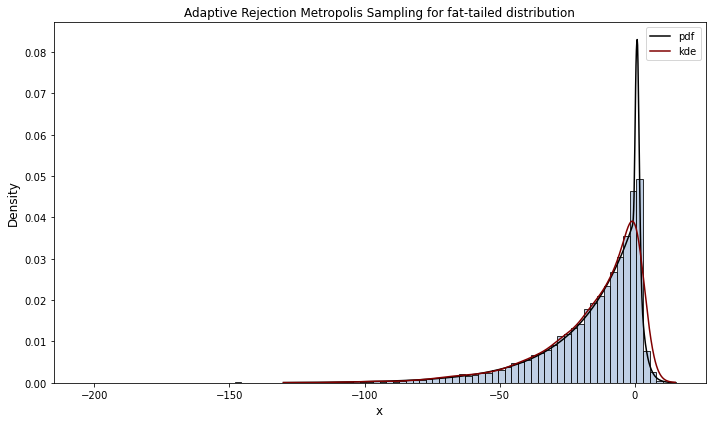

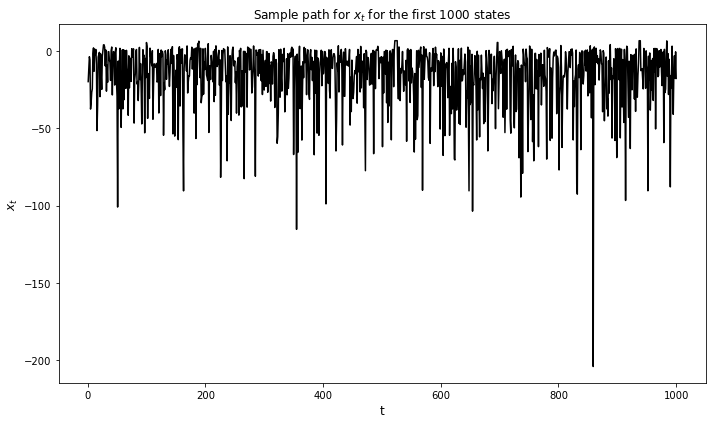

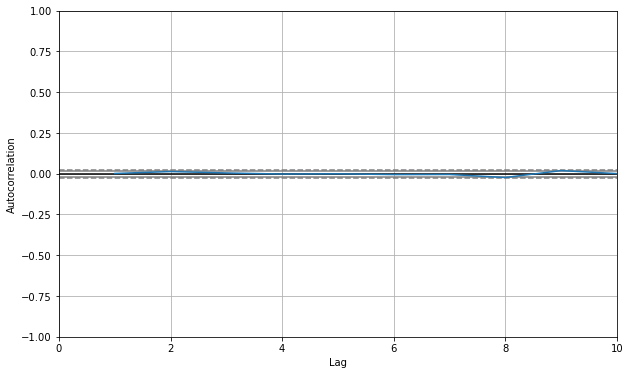

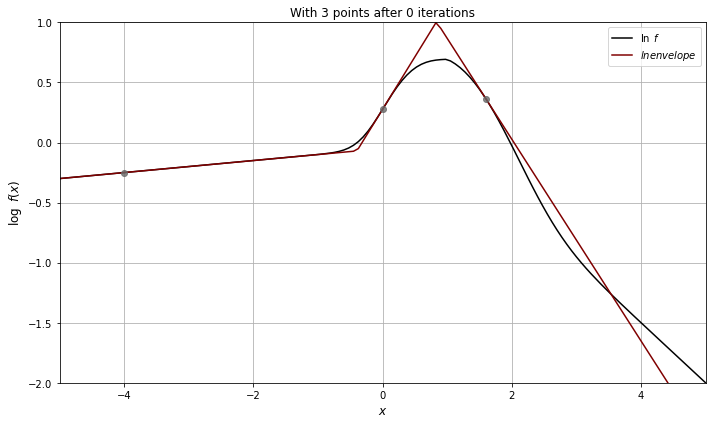

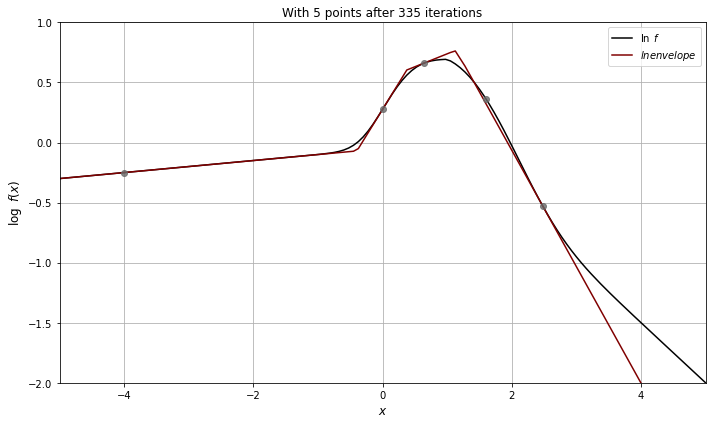

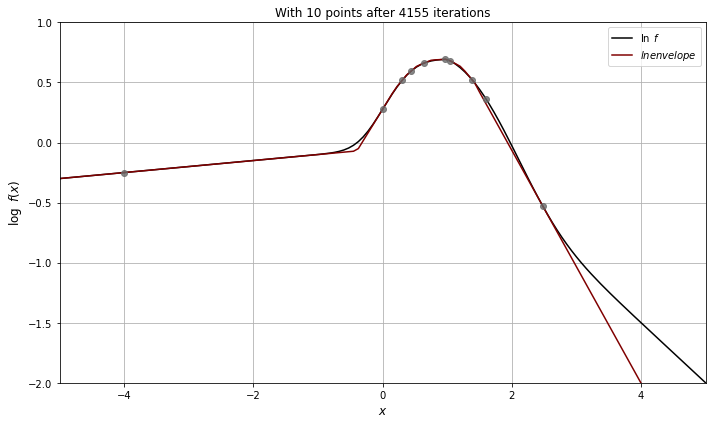

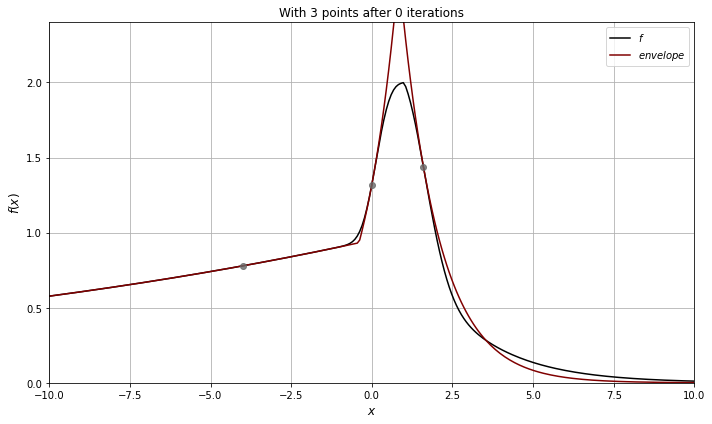

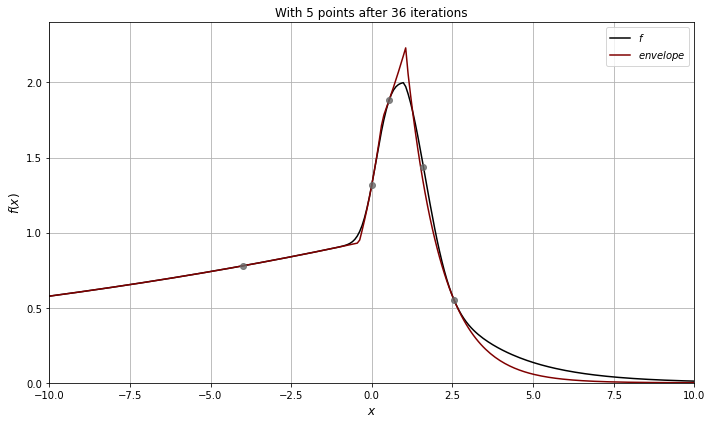

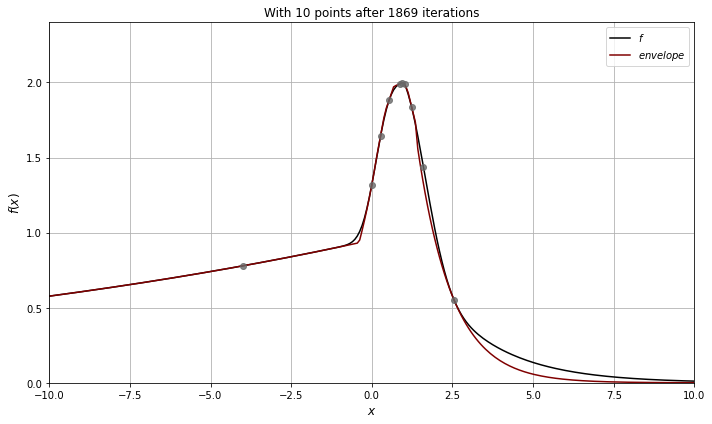

Acceptance probability: 0.9992006394884093
MH Acceptance probability: 0.9813


In [12]:
np.random.seed(2020)
N = 10000 # Number of draws
T_k = np.array([-4, 0., 1.6]) # Initial abscissae
z_limits = [float('-inf'), float('inf')] # Bounds in set for intersection points
x0 = 0.
burn_in = 10
bins = 90

target = fat_tailed_distribution_unnormalized()

# Define how to compute h(x) and h'(x)
log_prob = log_unnorm_fattailed

# Adaptive Rejection Metropolis sampling
samples, accept_prob, mh_accept_prob = adaptive_rejection_metropolis_sampling(N=N, x0=x0, burn_in=burn_in, log_prob=log_prob, xs=T_k, z_limits=z_limits)

# Get pdf and kde plot
x_plot = np.linspace(-130, 15, 1000) # Plotting range
title = f'Adaptive Rejection Metropolis Sampling for fat-tailed distribution'
target = fat_tailed_distribution()
fig = pdf_kde_plot(samples, x_plot, target, title, bins)

# Trace plot of sample path
title = f'Sample path for $x_t$ for the first 1000 states'
fig = trace_plot(samples[0:1000], title)

# Autocorrelation plot of sample draws
title = f'Adaptive Rejection Metropolis Sampling for fat-tailed distribution'
fig = autocorrelation_plot(samples, title='')

# Plot adaptive envelope and squeezing funtion on log-space and untransformed space
x_plot = np.linspace(-200, 100, 4000) # Plotting range
x_lim = [-5, 5] # Plotting limits
y_lim = [-2, 1] # Plotting limits
np.random.seed(2020)
target = fat_tailed_distribution_unnormalized()
samples, accept_prob, mh_accept_prob = adaptive_rejection_metropolis_sampling_plotting(N=N, x0=x0, x_plot=x_plot, x_lim=x_lim, y_lim=y_lim, log_prob=log_prob,
                                                                           xs=T_k, z_limits=z_limits, plot='linear')
np.random.seed(2020)
y_lim = [0, 2.4] # Plotting limits
x_lim = [-10, 10] # Plotting limits
samples, accept_prob, mh_accept_prob = adaptive_rejection_metropolis_sampling_plotting(N=N, x0=x0, x_plot=x_plot, x_lim=x_lim, y_lim=y_lim, log_prob=log_prob,
                                                                           xs=T_k, z_limits=z_limits, plot='exp')
print("Acceptance probability:", accept_prob)
print("MH Acceptance probability:", mh_accept_prob)

# lp = LineProfiler()
# lp_wrapper = lp(adaptive_rejection_metropolis_sampling)
# lp_wrapper(N=N, x0=x0, burn_in=burn_in, log_prob=log_prob, xs=T_k, z_limits=z_limits)
# lp.print_stats()

### Adaptive Rejection Metropolis Sampling with unnormalized bimodal distribution as target density

Acceptance probability: 0.994431185361973
Acceptance probability: 0.9978


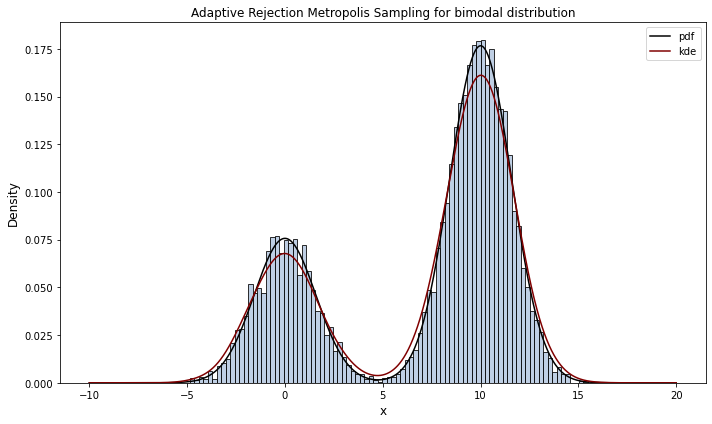

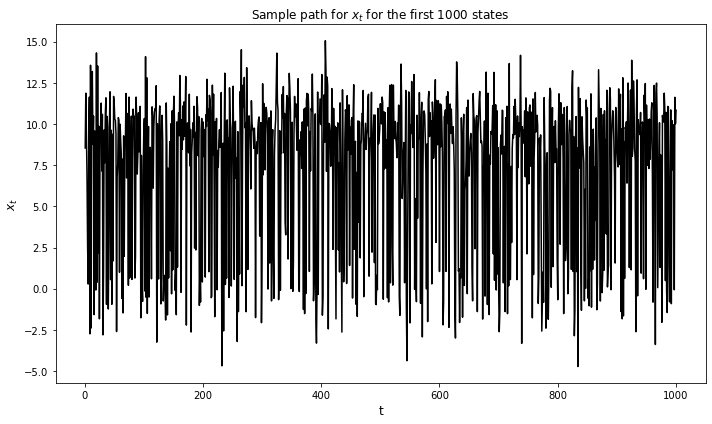

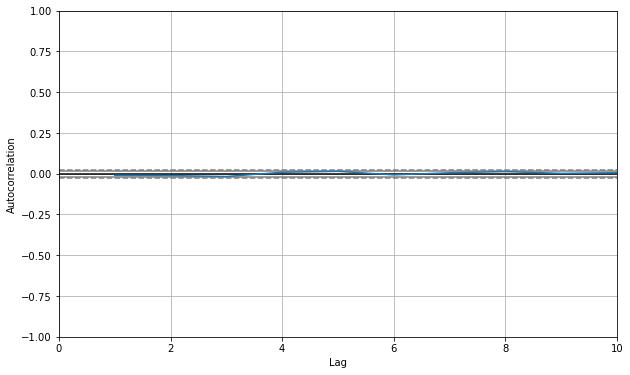

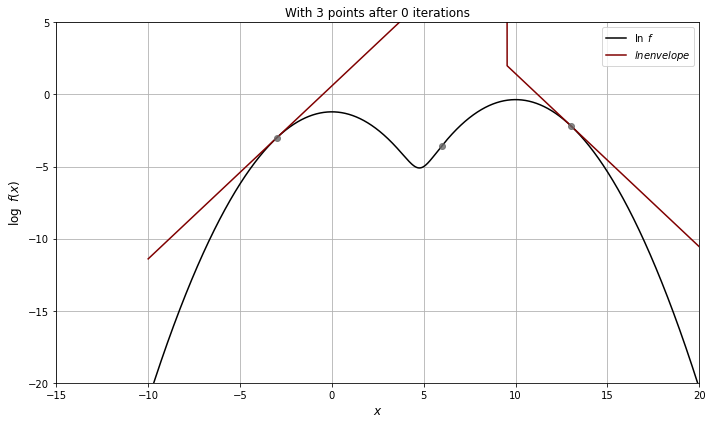

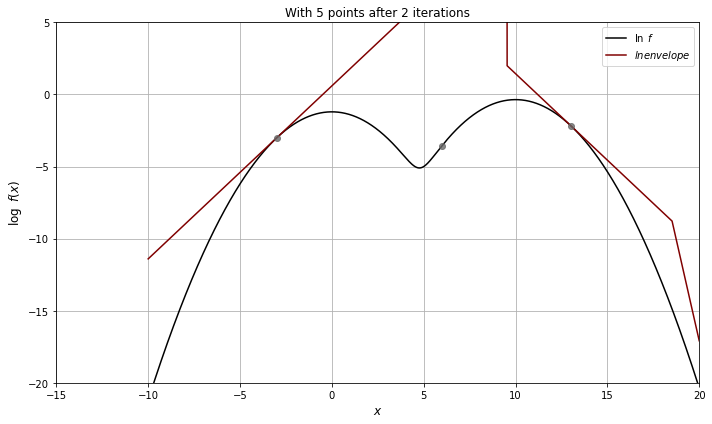

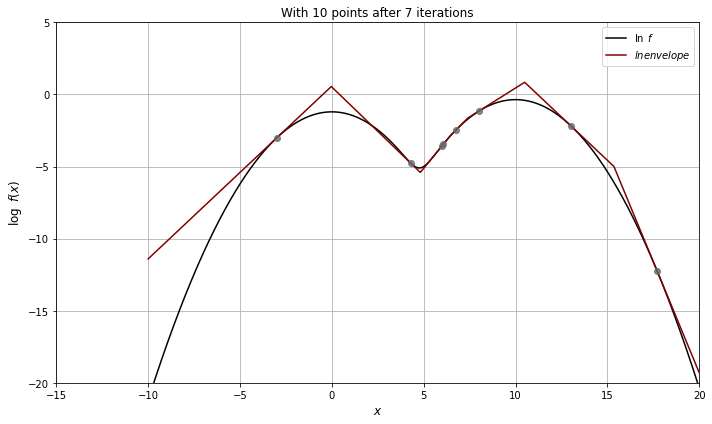

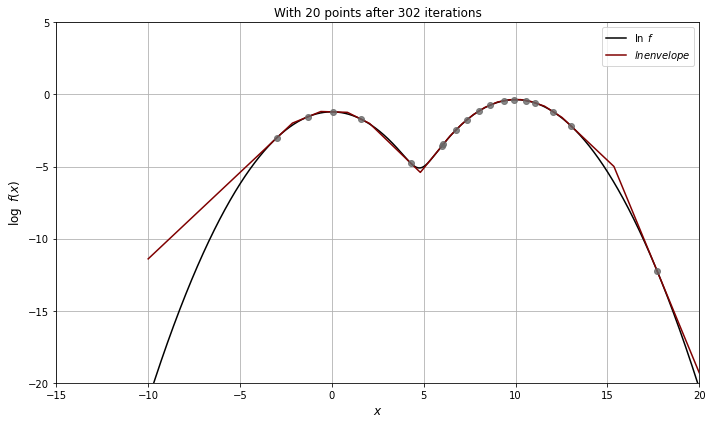

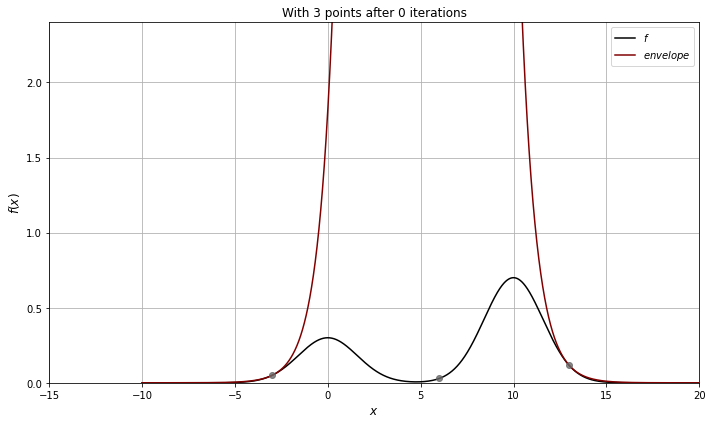

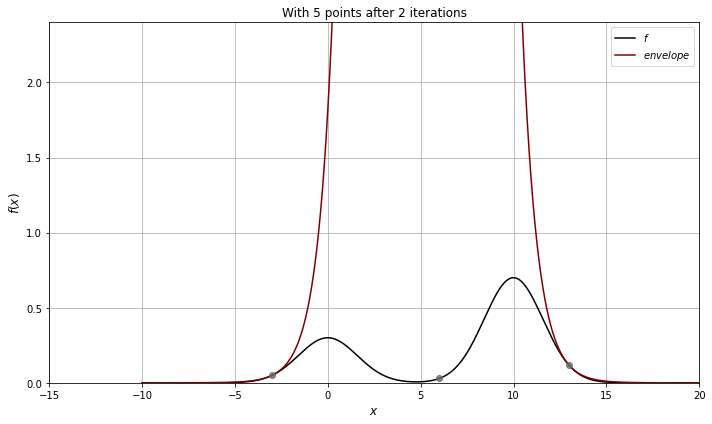

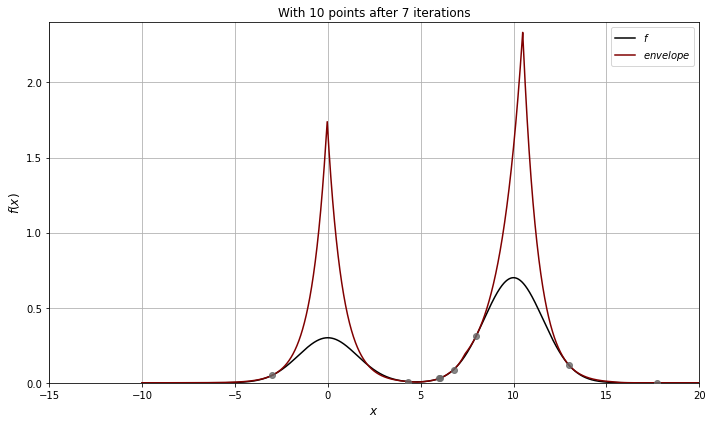

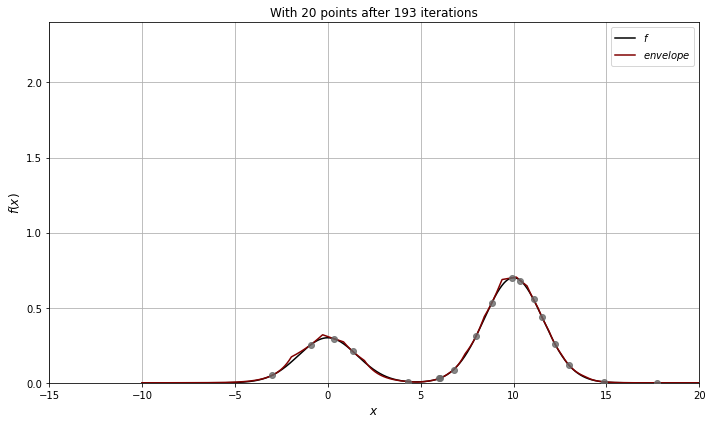

In [13]:
np.random.seed(2020)
N = 10000 # Number of draws
T_k = np.array([-3., 6., 13.]) # Initial abscissae
z_limits = [float('-inf'), float('inf')] # Bounds in set for intersection points
x0 = 0.
burn_in = 0
bins = 90

target = normalized_bimodal_distribution()

# Define how to compute h(x) and h'(x)
log_prob = log_unnorm_bimodal()

# Adaptive Rejection Metropolis sampling
samples, accept_prob, mh_accept_prob = adaptive_rejection_metropolis_sampling(N=N, x0=x0, burn_in=burn_in, log_prob=log_prob, xs=T_k, z_limits=z_limits)
print("Acceptance probability:", accept_prob)
print("Acceptance probability:", mh_accept_prob)

# Get pdf and kde plot
x_plot = np.linspace(-10, 20, 4000) # Plotting range
title = f'Adaptive Rejection Metropolis Sampling for bimodal distribution'
fig = pdf_kde_plot(samples, x_plot, target, title, bins)

# Trace plot of sample path
title = f'Sample path for $x_t$ for the first 1000 states'
fig = trace_plot(samples[0:1000], title)

# Autocorrelation plot of sample draws
title = f'Adaptive Rejection Metropolis Sampling for bimodal distribution'
fig = autocorrelation_plot(samples, title='')

# Plot adaptive envelope and squeezing funtion on log-space and untransformed space
x_plot = np.linspace(-10, 20, 4000) # Plotting range
x_lim = [-15, 20] # Plotting limits
y_lim = [-20, 5] # Plotting limits
np.random.seed(2020)
samples, accept_prob, mh_accept_prob = adaptive_rejection_metropolis_sampling_plotting(N=N, x0=x0, x_plot=x_plot, x_lim=x_lim, y_lim=y_lim, log_prob=log_prob,
                                                                           xs=T_k, z_limits=z_limits, plot='linear')
np.random.seed(2020)
y_lim = [0, 2.4] # Plotting limits
x_lim = [-15, 20] # Plotting limits
samples, accept_prob, mh_accept_prob = adaptive_rejection_metropolis_sampling_plotting(N=N, x0=x0, x_plot=x_plot, x_lim=x_lim, y_lim=y_lim, log_prob=log_prob,
                                                                           xs=T_k, z_limits=z_limits, plot='exp')

# lp = LineProfiler()
# lp_wrapper = lp(naive_adaptive_rejection_metropolis_sampling)
# lp_wrapper(N=N, x0=x0, burn_in=burn_in, log_prob=log_prob, xs=T_k, z_limits=z_limits)
# lp.print_stats()

### Adaptive Rejection Metropolis Sampling with unnormalized multimodal distribution as target density

Acceptance probability: 0.997406742469579
MH Acceptance probability: 0.8919


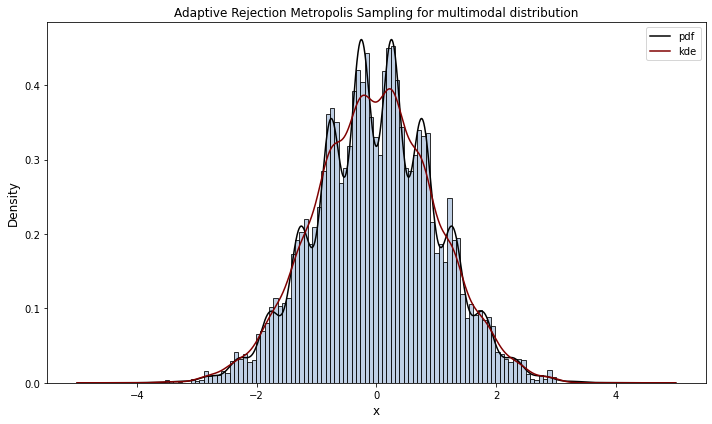

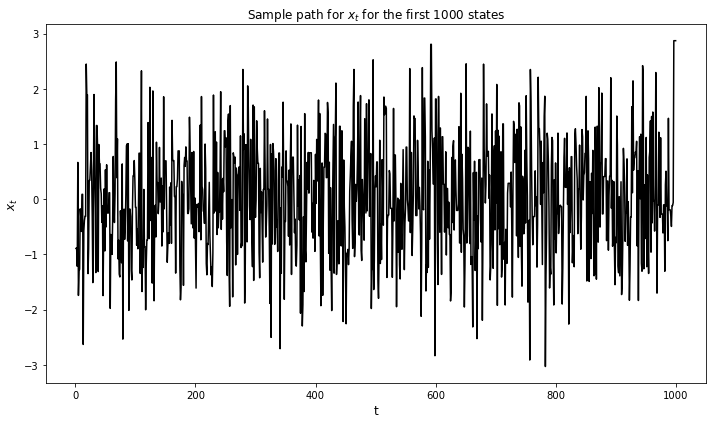

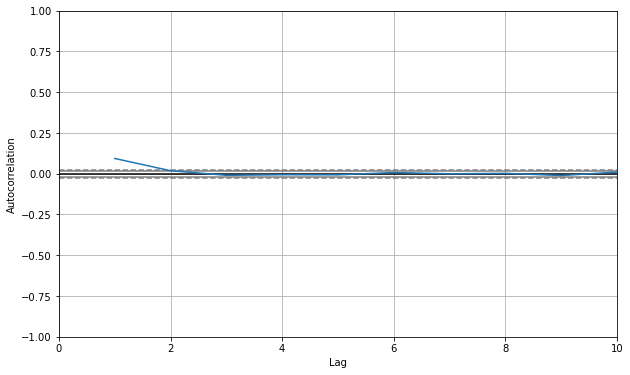

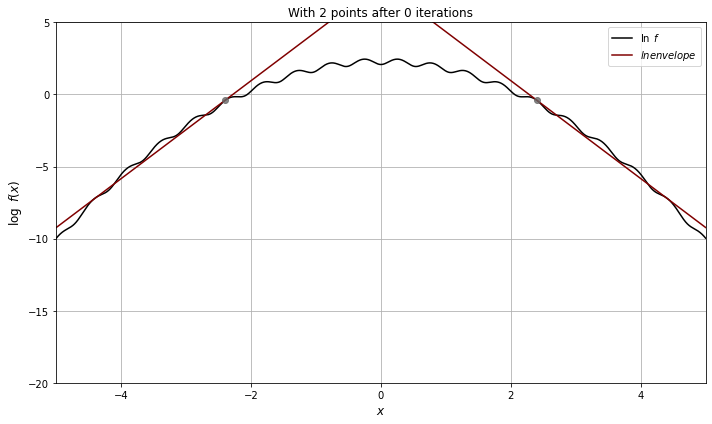

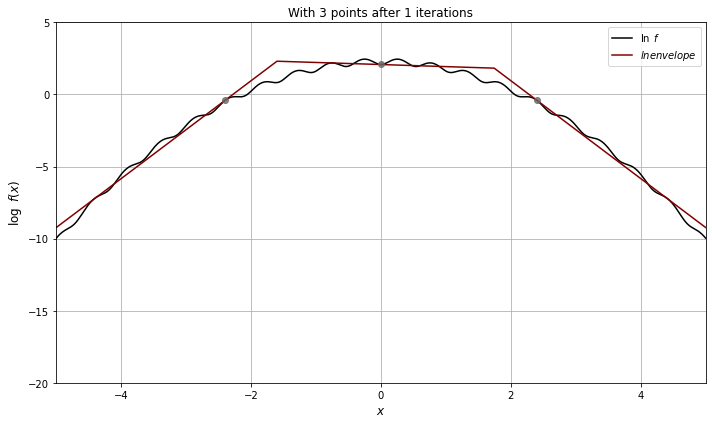

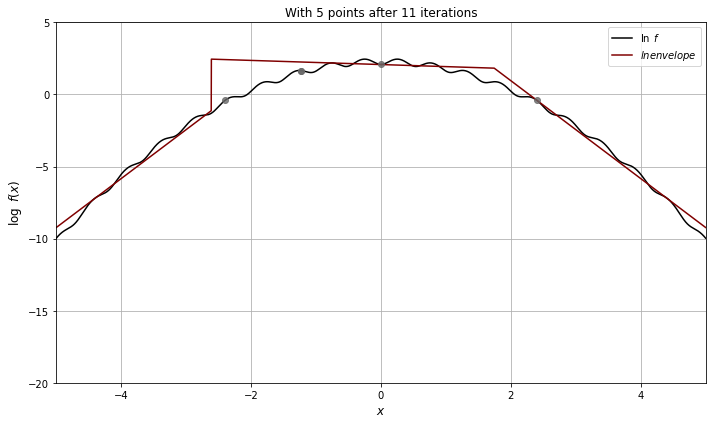

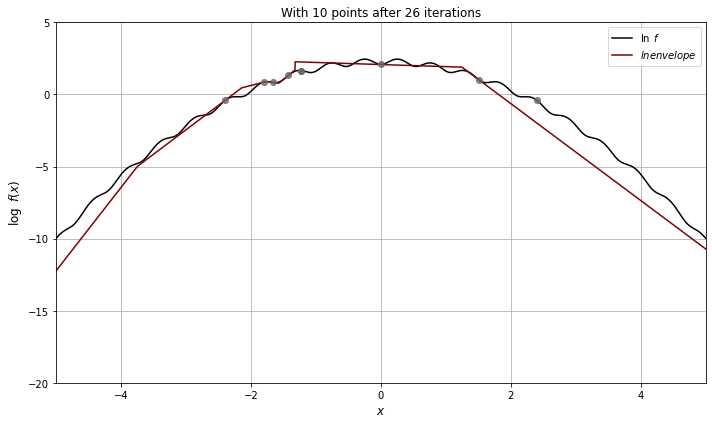

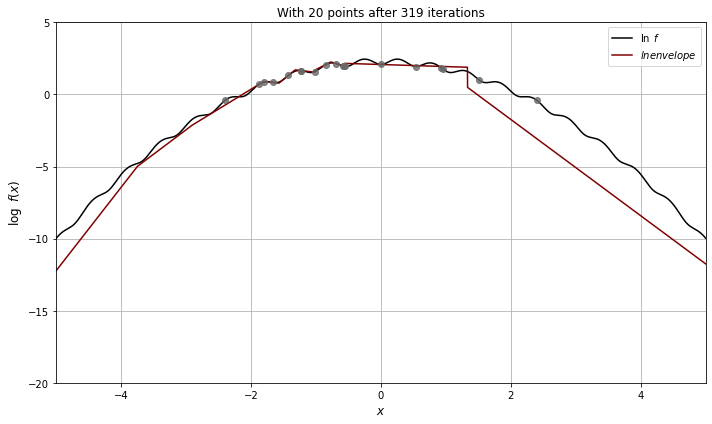

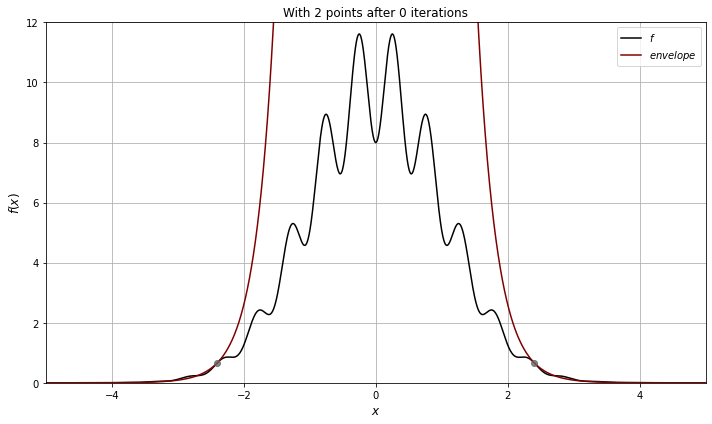

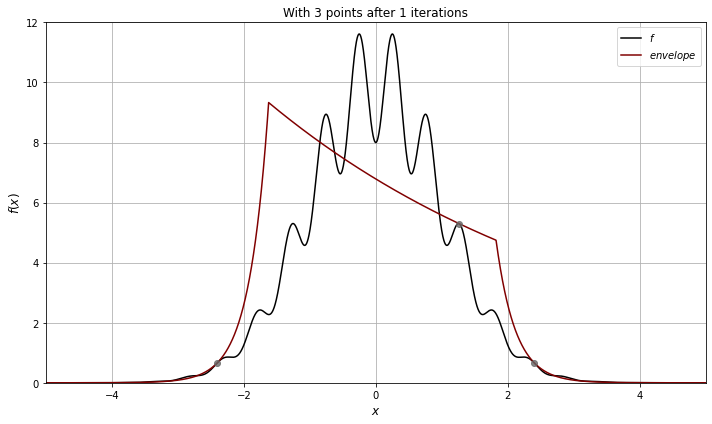

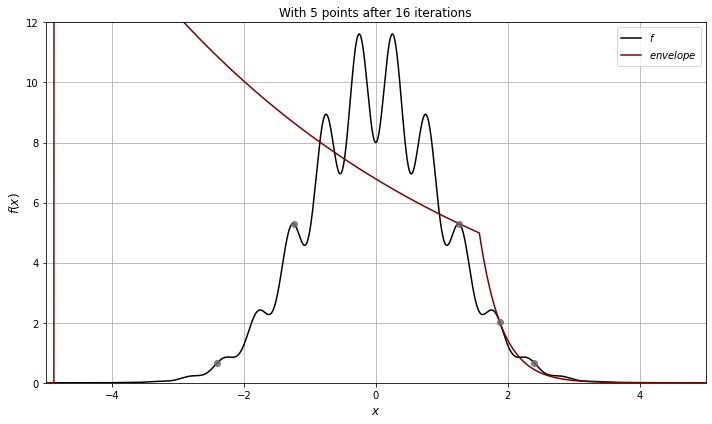

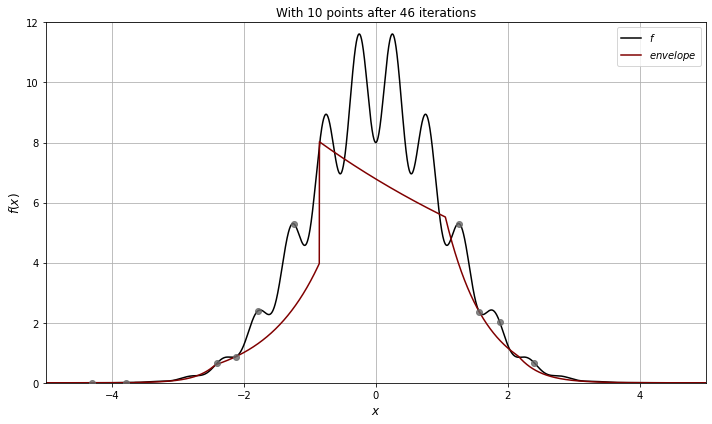

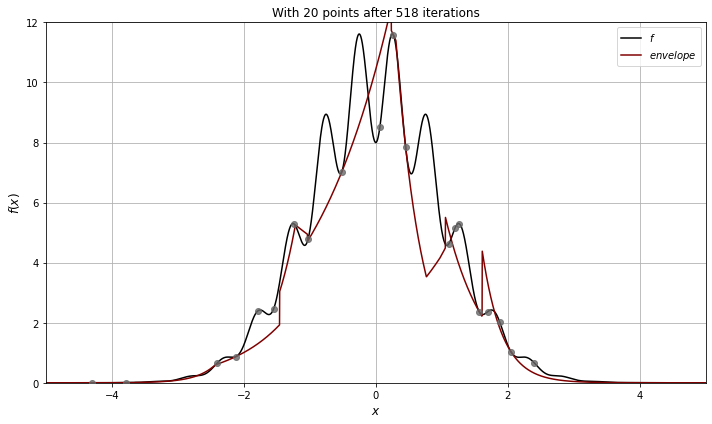

Acceptance probability: 0.9941346058256287
MH Acceptance probability: 0.8939


In [60]:
np.random.seed(2020)
N = 10000 # Number of draws
T_k = np.array([-2.4, 2.4]) # Initial abscissae - chosen to ensure first and last abscissae always has h'(x)>0 and h'(x)<0 respectively to form an envelope
z_limits = [float('-inf'), float('inf')] # Bounds in set for intersection points
x0 = 0.
burn_in = 0
bins = 90

target = normalized_multimodal_distribution()

# Define how to compute h(x) and h'(x)
log_prob = log_unnorm_multimodal()

# Adaptive Rejection Metropolis sampling
samples, accept_prob, mh_accept_prob = adaptive_rejection_metropolis_sampling(N=N, x0=x0, burn_in=burn_in, log_prob=log_prob, xs=T_k, z_limits=z_limits)
print("Acceptance probability:", accept_prob)
print("MH Acceptance probability:", mh_accept_prob)
# Get pdf and kde plot
x_plot = np.linspace(-5, 5, 4000) # Plotting range
title = f'Adaptive Rejection Metropolis Sampling for multimodal distribution'
fig = pdf_kde_plot(samples, x_plot, target, title, bins)

# Trace plot of sample path
title = f'Sample path for $x_t$ for the first 1000 states'
fig = trace_plot(samples[0:1000], title)

# Autocorrelation plot of sample draws
title = f'Adaptive Rejection Metropolis Sampling for multimodal distribution'
fig = autocorrelation_plot(samples, title='')

# Plot adaptive envelope and squeezing funtion on log-space and untransformed space
x_plot = np.linspace(-5, 5, 4000) # Plotting range
x_lim = [-5, 5] # Plotting limits
y_lim = [-20, 5] # Plotting limits
np.random.seed(2020)
samples, accept_prob, mh_accept_prob = adaptive_rejection_metropolis_sampling_plotting(N=N, x0=x0, x_plot=x_plot, x_lim=x_lim, y_lim=y_lim, log_prob=log_prob,
                                                                           xs=T_k, z_limits=z_limits, plot='linear')
np.random.seed(2020)
y_lim = [0, 12] # Plotting limits
x_lim = [-5, 5] # Plotting limits
samples, accept_prob, mh_accept_prob = adaptive_rejection_metropolis_sampling_plotting(N=N, x0=x0, x_plot=x_plot, x_lim=x_lim, y_lim=y_lim, log_prob=log_prob,
                                                                           xs=T_k, z_limits=z_limits, plot='exp')
print("Acceptance probability:", accept_prob)
print("MH Acceptance probability:", mh_accept_prob)

# lp = LineProfiler()
# lp_wrapper = lp(naive_adaptive_rejection_metropolis_sampling)
# lp_wrapper(N=N, x0=x0, burn_in=burn_in, log_prob=log_prob, xs=T_k, z_limits=z_limits)
# lp.print_stats()

# Metropolis-Hastings in univariate setting

### MH with logistic as proposal and gamma distribution as target

Independent MH acceptance probability 0.8733
Random Walk MH acceptance probability 0.4521


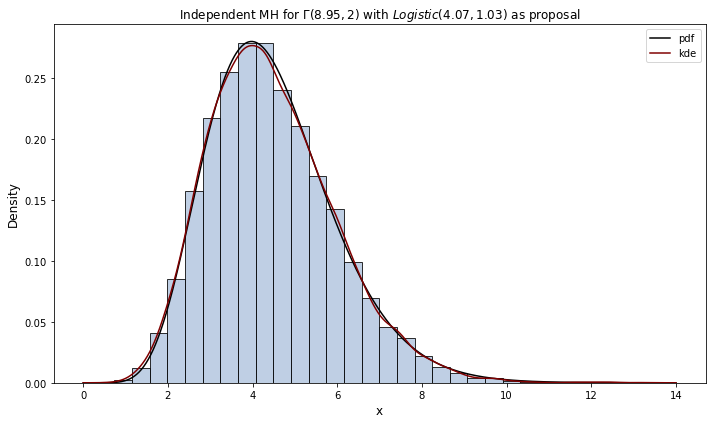

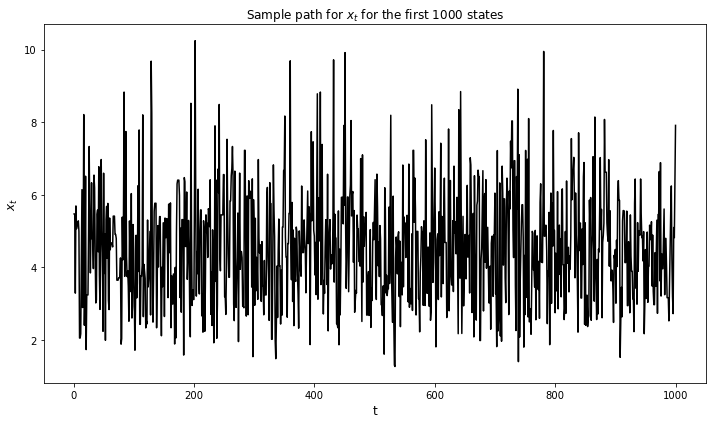

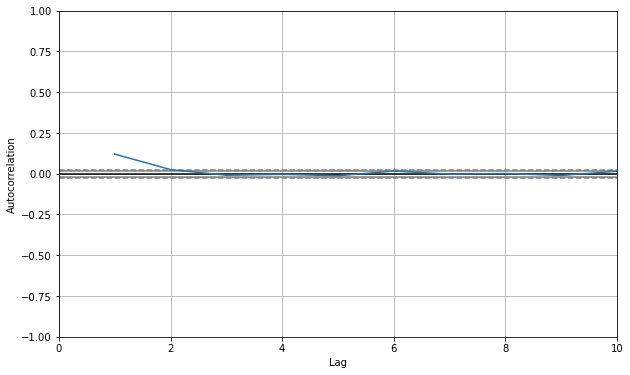

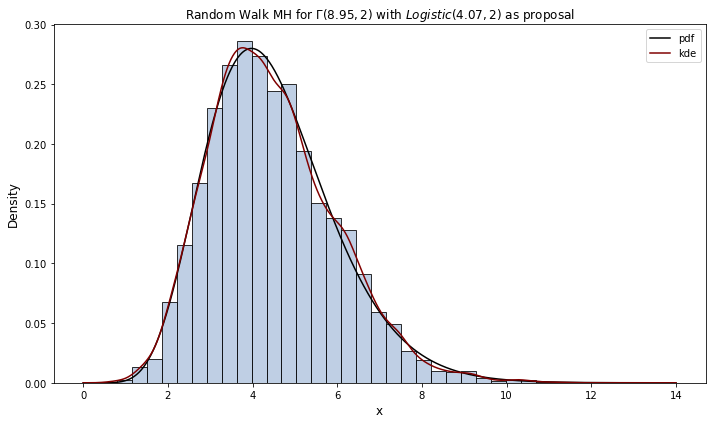

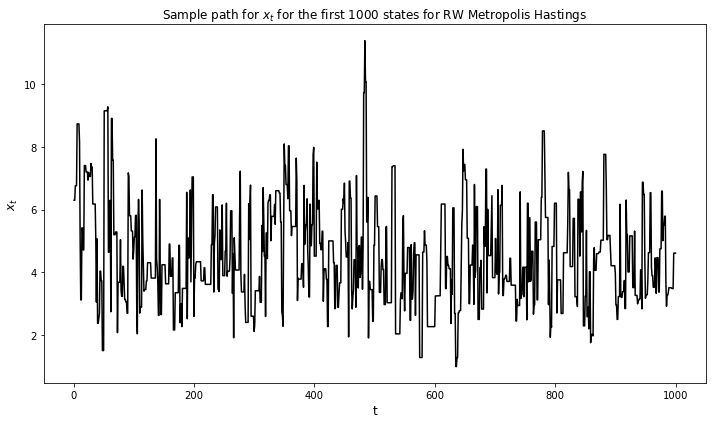

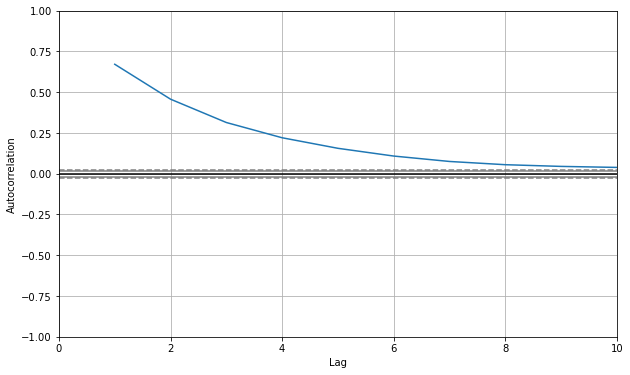

In [62]:
np.random.seed(2020)
N = 10000 # Number of draws
burn_in = 0 # Burn-in period
x0 = 5. # Initial value
a = 8.95 # Parameter in gamma distribution
beta = 2 # Parameter in gamma distribution
loc = 4.07 # Location parameter in logistic distribution
scale = 1.03 # Scale parameter in logistic distribution

target = Gamma(a, beta)
proposal = Logistic(loc, scale)

# Independent Metropolis-Hastings Sampling
samples, ind_MH_accept_prob = independent_metropolis_hastings_univariate(x0, N, burn_in, target, proposal)

# Get pdf and kde plot
x_plot = np.linspace(0, 14, 1000) # Plotting range
title = f'Independent MH for $\Gamma({a},{beta})$ with $Logistic({loc},{scale})$ as proposal'
fig = pdf_kde_plot(samples, x_plot, target, title)

# Trace plot of sample path
title = f'Sample path for $x_t$ for the first 1000 states'
fig = trace_plot(samples[0:1000], title)

# Autocorrelation plot of sample draws
title = f'Independent MH for $\Gamma({a},{beta})$ with $Logistic({loc},{scale})$ as proposal'
fig = autocorrelation_plot(samples, title='')

print("Independent MH acceptance probability", ind_MH_accept_prob)

scale = 2 # Scale parameter in logistic distribution
proposal = Logistic(loc, scale)
target = Gamma(a, beta)

# Random Walk Metropolis-Hastings Sampling
samples, rw_MH_accept_prob = rw_metropolis_hastings_univariate(x0, N, burn_in, target, proposal)

# Get pdf and kde plot
x_plot = np.linspace(0, 14, 1000) # Plotting range
title = f'Random Walk MH for $\Gamma({a},{beta})$ with $Logistic({loc},{scale})$ as proposal'
fig = pdf_kde_plot(samples, x_plot, target, title)

# Trace plot of sample path
title = f'Sample path for $x_t$ for the first 1000 states for RW Metropolis Hastings'
fig = trace_plot(samples[0:1000], title)

# Autocorrelation plot of sample draws
title = f'Random Walk MH for $\Gamma({a},{beta})$ with $Logistic({loc},{scale})$ as proposal'
fig = autocorrelation_plot(samples, title='')

print("Random Walk MH acceptance probability", rw_MH_accept_prob)

# lp = LineProfiler()
# lp_wrapper = lp(independent_metropolis_hastings_univariate)
# lp_wrapper(x0, N, burn_in, target, proposal)
# lp.print_stats()

### MH with Cauchy as proposal and fat-tailed distribution as target

Independent MH acceptance probability 0.5883
Random Walk MH acceptance probability 0.3112


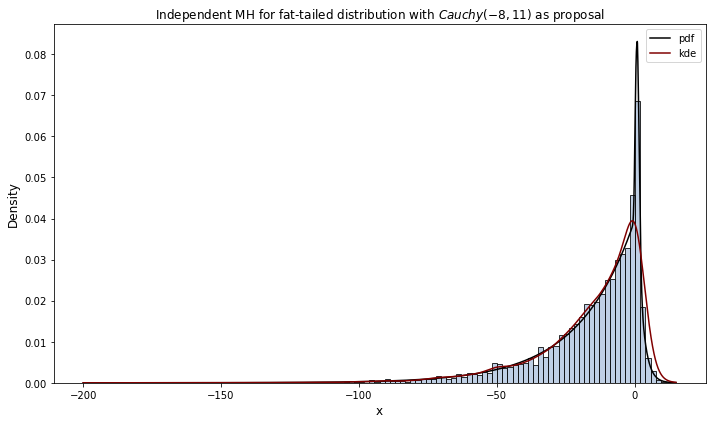

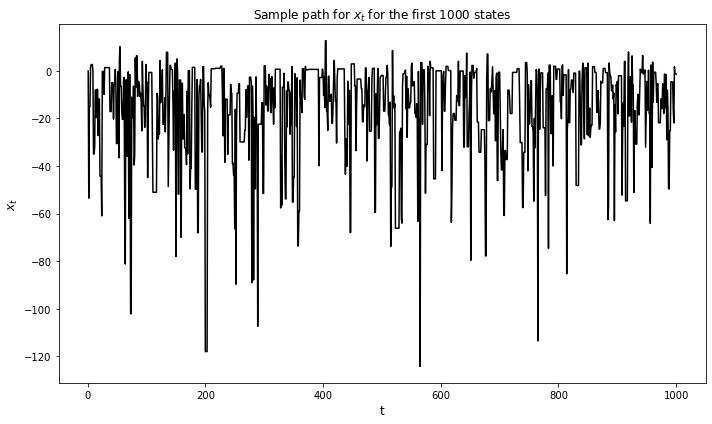

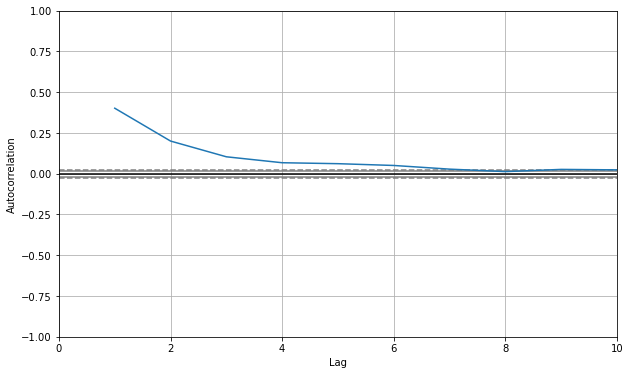

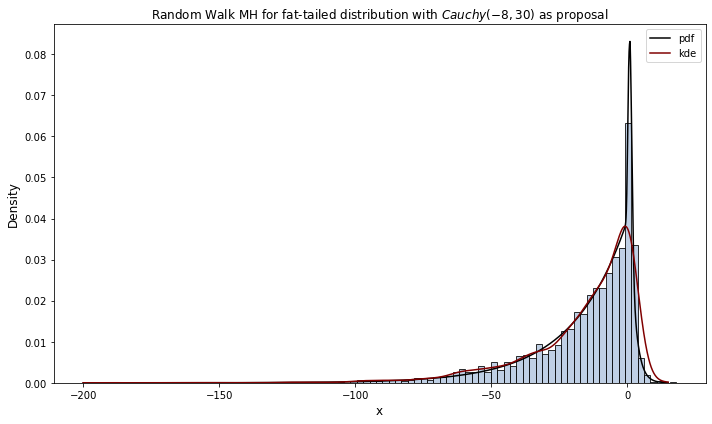

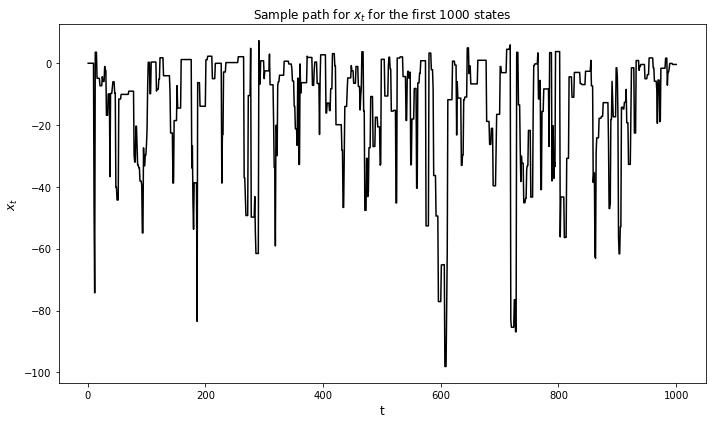

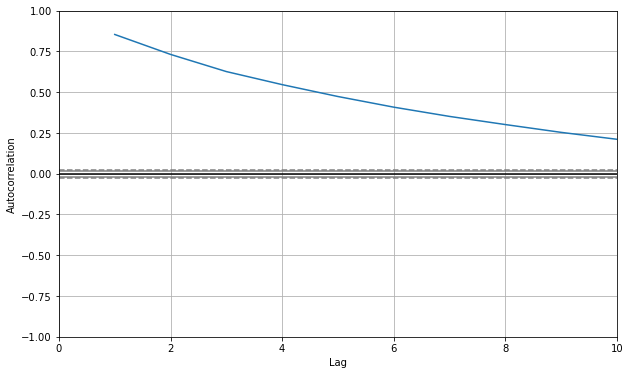

In [64]:
np.random.seed(2020)
N = 10000 # Number of draws
loc = -8 # Location parameter in Cauchy distribution
scale = 11 # Scale parameter in Cauchy distribution
bins = 90
burn_in = 0 # Burn-in period
x0 = 0. # Initial value

target = fat_tailed_distribution_unnormalized()
proposal = Cauchy(loc, scale)

# Independent Metropolis-Hastings Sampling
samples, ind_MH_accept_prob = independent_metropolis_hastings_univariate(x0, N, burn_in, target, proposal)

# Get pdf and kde plot
target = fat_tailed_distribution()
x_plot = np.linspace(-200, 15, 4000) # Plotting range
title = f'Independent MH for fat-tailed distribution with $Cauchy({loc},{scale})$ as proposal'
fig = pdf_kde_plot(samples, x_plot, target, title, bins)

# Trace plot of sample path
title = f'Sample path for $x_t$ for the first 1000 states'
fig = trace_plot(samples[0:1000], title)

# Autocorrelation plot of sample draws
title = f'Independent MH for fat-tailed distribution with $Cauchy({loc},{scale})$ as proposal'
fig = autocorrelation_plot(samples, title='')

print("Independent MH acceptance probability", ind_MH_accept_prob)

scale = 30 # Scale parameter in Cauchy distribution
proposal = Cauchy(loc, scale)
target = fat_tailed_distribution_unnormalized()

# Random Walk Metropolis-Hastings Sampling
samples, rw_MH_accept_prob = rw_metropolis_hastings_univariate(x0, N, burn_in, target, proposal)

# Get pdf and kde plot
target = fat_tailed_distribution()
x_plot = np.linspace(-200, 15, 4000) # Plotting range
title = f'Random Walk MH for fat-tailed distribution with $Cauchy({loc},{scale})$ as proposal'
fig = pdf_kde_plot(samples, x_plot, target, title, bins)

# Trace plot of sample path
title = f'Sample path for $x_t$ for the first 1000 states'
fig = trace_plot(samples[0:1000], title)

# Autocorrelation plot of sample draws
title = f'Random Walk MH for fat-tailed distribution with $Cauchy({loc},{scale})$ as proposal'
fig = autocorrelation_plot(samples, title='')

print("Random Walk MH acceptance probability", rw_MH_accept_prob)


### MH with normal as proposal and bimodal distribution as target

Independent MH acceptance probability 0.4687
Random Walk MH acceptance probability 0.2963


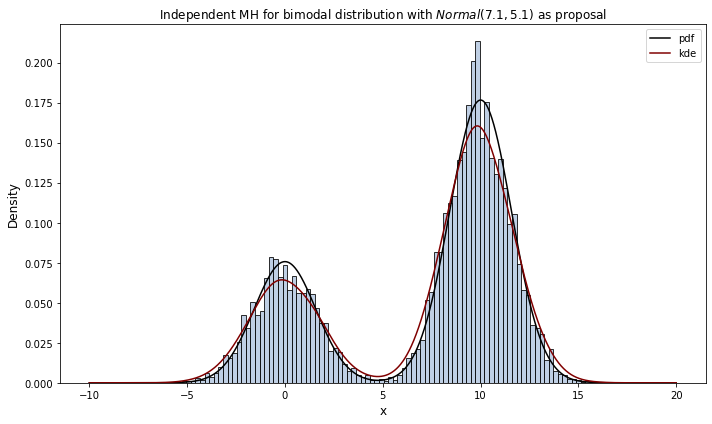

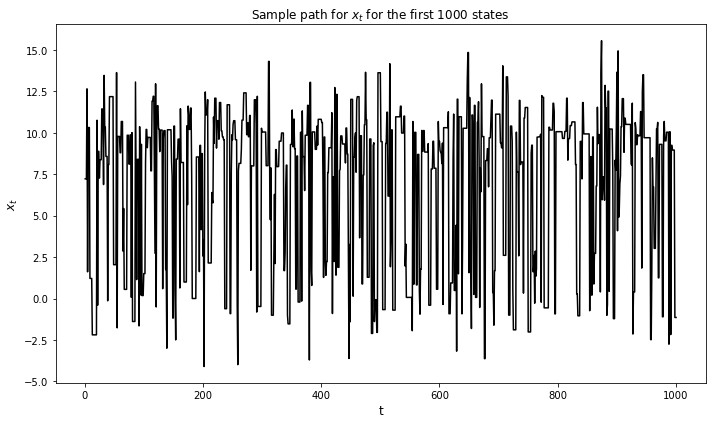

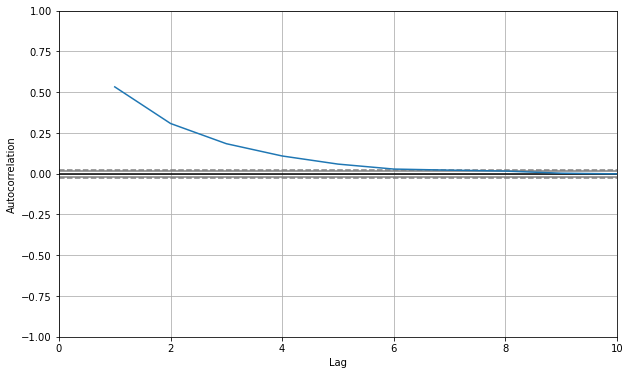

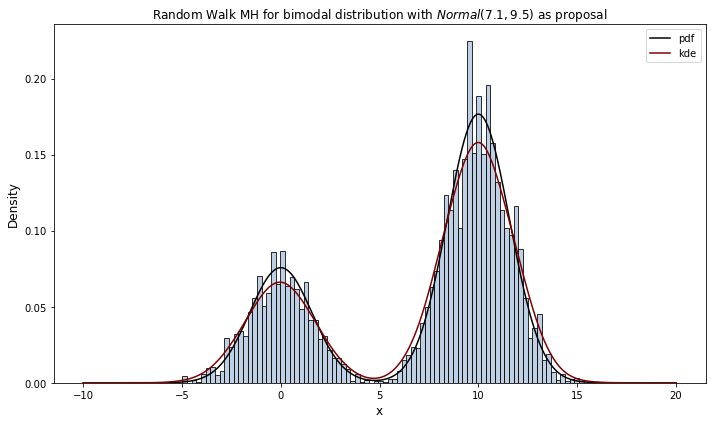

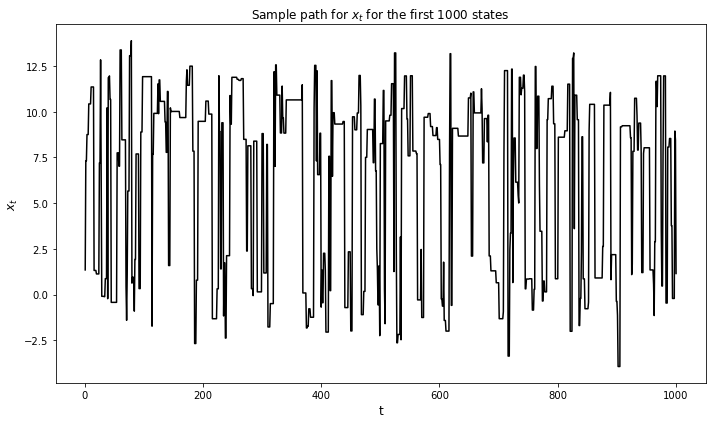

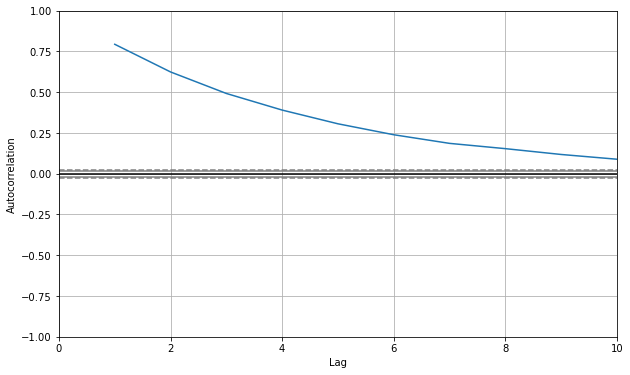

In [70]:
np.random.seed(2020)
N = 10000 # Number of draws
loc = 7.1 # Mean in normal distribution
scale = 5.1 # Std dev in normal distribution
bins = 90
burn_in = 0 # Burn-in period
x0 = 5. # Initial value

target = unnormalized_bimodal_distribution()
proposal = Normal(loc, scale)

# Independent Metropolis-Hastings Sampling
samples, ind_MH_accept_prob = naive_independent_metropolis_hastings_univariate(x0, N, burn_in, target, proposal)

# Get pdf and kde plot
target = normalized_bimodal_distribution()
x_plot = np.linspace(-10, 20, 4000) # Plotting range
title = f'Independent MH for bimodal distribution with $Normal({loc},{scale})$ as proposal'
fig = pdf_kde_plot(samples, x_plot, target, title, bins)

# Trace plot of sample path
title = f'Sample path for $x_t$ for the first 1000 states'
fig = trace_plot(samples[0:1000], title)

# Autocorrelation plot of sample draws
title = f'Independent MH for bimodal distribution with $Normal({loc},{scale})$ as proposal'
fig = autocorrelation_plot(samples, title='')

print("Independent MH acceptance probability", ind_MH_accept_prob)

scale = 9.5 # Std dev in normal distribution
proposal = Normal(loc, scale)
target = unnormalized_bimodal_distribution()

# Random Walk Metropolis-Hastings Sampling
samples, rw_MH_accept_prob = naive_rw_metropolis_hastings_univariate(x0, N, burn_in, target, proposal)

# Get pdf and kde plot
target = normalized_bimodal_distribution()
x_plot = np.linspace(-10, 20, 4000) # Plotting range
title = f'Random Walk MH for bimodal distribution with $Normal({loc},{scale})$ as proposal'
fig = pdf_kde_plot(samples, x_plot, target, title, bins)

# Trace plot of sample path
title = f'Sample path for $x_t$ for the first 1000 states'
fig = trace_plot(samples[0:1000], title)

# Autocorrelation plot of sample draws
title = f'Random Walk MH for bimodal distribution with $Normal({loc},{scale})$ as proposal'
fig = autocorrelation_plot(samples, title='')

print("Random Walk MH acceptance probability", rw_MH_accept_prob)

### MH with normal as proposal and multimodal distribution as target

Independent MH acceptance probability 0.9272
Random Walk MH acceptance probability 0.4987


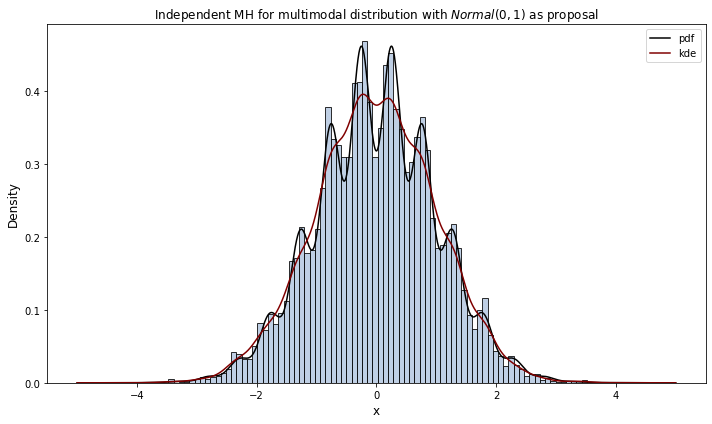

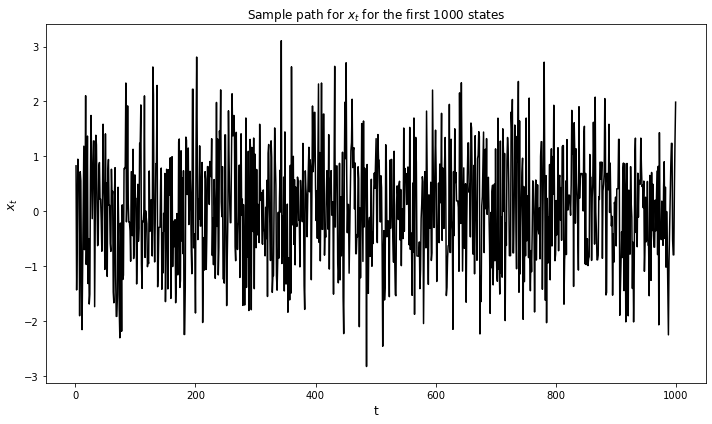

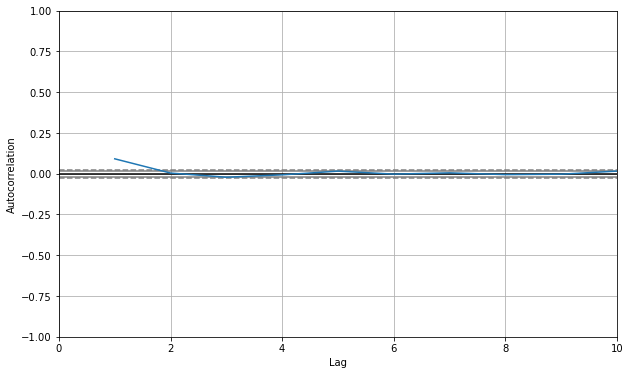

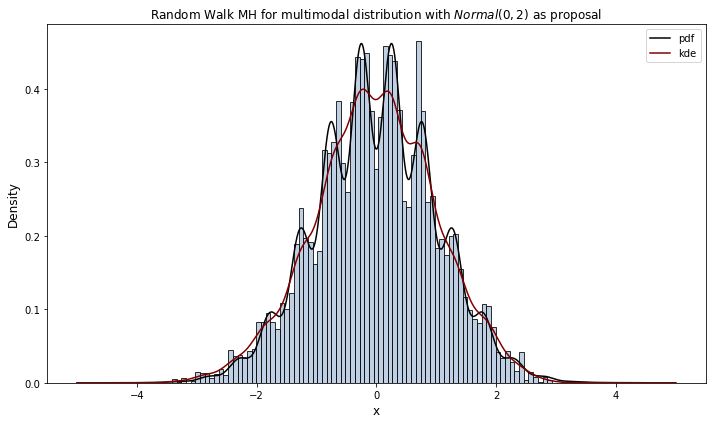

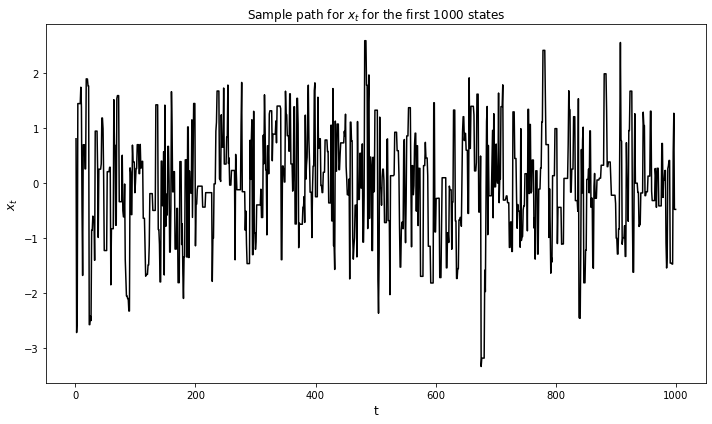

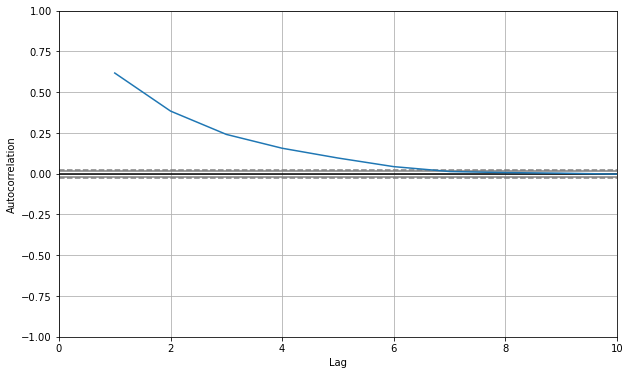

In [71]:
np.random.seed(2020)
N = 10000 # Number of draws
loc = 0 # Mean in normal distribution
scale = 1 # Std dev in normal distribution
bins = 90
burn_in = 0 # Burn-in period
x0 = 0. # Initial value

target = unnormalized_multimodal_distribution()
proposal = Normal(loc, scale)

# Independent Metropolis-Hastings Sampling
samples, ind_MH_accept_prob = independent_metropolis_hastings_univariate(x0, N, burn_in, target, proposal)

# Get pdf and kde plot
target = normalized_multimodal_distribution()
x_plot = np.linspace(-5, 5, 4000) # Plotting range
title = f'Independent MH for multimodal distribution with $Normal({loc},{scale})$ as proposal'
fig = pdf_kde_plot(samples, x_plot, target, title, bins)

# Trace plot of sample path
title = f'Sample path for $x_t$ for the first 1000 states'
fig = trace_plot(samples[0:1000], title)

# Autocorrelation plot of sample draws
title = f'Independent MH for multimodal distribution with $Normal({loc},{scale})$ as proposal'
fig = autocorrelation_plot(samples, title='')

print("Independent MH acceptance probability", ind_MH_accept_prob)

scale = 2 # Std dev in normal distribution
proposal = Normal(loc, scale)
target = unnormalized_multimodal_distribution()

# Random Walk Metropolis-Hastings Sampling
samples, rw_MH_accept_prob = rw_metropolis_hastings_univariate(x0, N, burn_in, target, proposal)

# Get pdf and kde plot
target = normalized_multimodal_distribution()
x_plot = np.linspace(-5, 5, 4000) # Plotting range
title = f'Random Walk MH for multimodal distribution with $Normal({loc},{scale})$ as proposal'
fig = pdf_kde_plot(samples, x_plot, target, title, bins)

# Trace plot of sample path
title = f'Sample path for $x_t$ for the first 1000 states'
fig = trace_plot(samples[0:1000], title)

# Autocorrelation plot of sample draws
title = f'Random Walk MH for multimodal distribution with $Normal({loc},{scale})$ as proposal'
fig = autocorrelation_plot(samples, title='')

print("Random Walk MH acceptance probability", rw_MH_accept_prob)

# Simple accept-reject sampling in multivariate setting

### 3D envelope for bivariate standard normal using bivariate Cauchy as proposal

Acceptance probability 0.5027146591594611


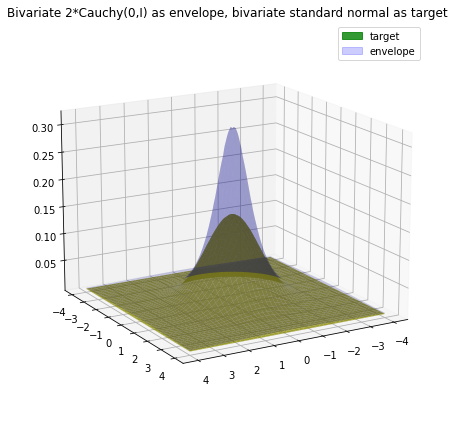

In [72]:
np.random.seed(2020)
N = 10000
D = 2 # Dimensions
mu = np.zeros(D) # Mean vector in normal distribution
cov = np.identity(D) # Covariance matrix in normal distribution
M = 2 # Mulitplicative factor in envelope
loc = np.zeros(D) # Location parameter in logistic distribution
shape = np.identity(D) # Scale parameter in logistic distribution

target = stats.multivariate_normal(mean=mu, cov=cov)
proposal = stats.multivariate_t(loc=loc, shape=shape, df=1)

# Bounds parameters
x_abs = 4
y_abs = 4
x_grid, y_grid = np.mgrid[-x_abs-.01:x_abs+.01:.01, -y_abs-.01:y_abs+.01:.01]
title = f'Bivariate {M}*Cauchy(0,I) as envelope, bivariate standard normal as target'
fig = envelope3D_plot(x_grid, y_grid, M, target, proposal, title)

samples, accept_prob = naive_simple_accept_reject_multivariate(N, M, D, target, proposal)
print("Acceptance probability", accept_prob)

# fig = contour_plot(samples, x_grid, y_grid, target)

### 3D envelope for bivariate mixture distribution using bivariate Cauchy as proposal

Acceptance probability 0.03985778741450505


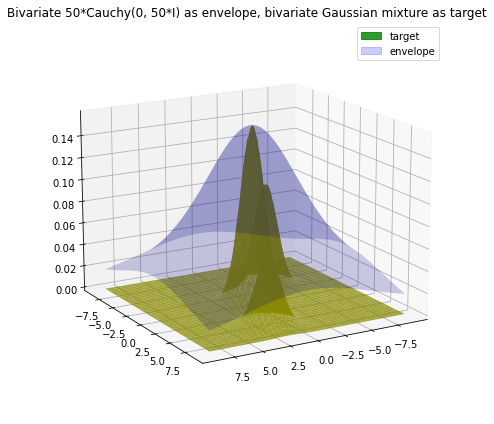

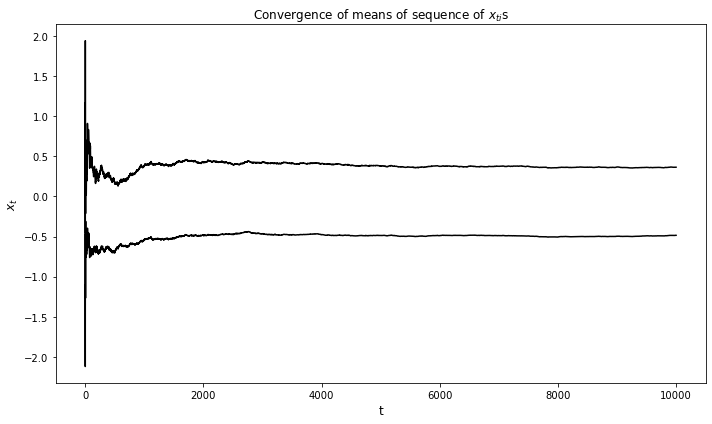

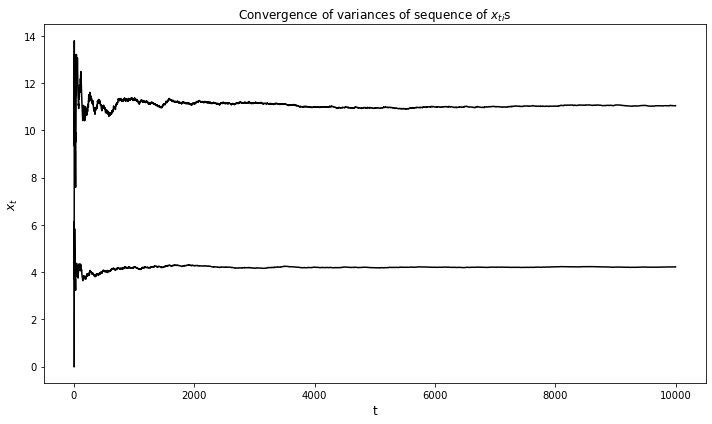

In [73]:
np.random.seed(2020)
N = 10000
D = 2 # Dimensions
mu1 = np.zeros(D) # Mean vector for first mixture component
cov1 = np.identity(D) # Covariance matrix for first mixture component
mu2 = [2, 6] # Mean vector for second mixture component
cov2 = np.identity(D) # Covariance matrix for second mixture component
mu3 = [-3, -3] # Mean vector for third mixture component
cov3 = np.identity(D) # Covariance matrix for third mixture component
M = 50 # Mulitplicative factor in envelope
loc = [0, 0] # Location parameter in Cauchy
shape = 50 * np.identity(D) # Scale parameter in Cauchy
T = 1 + np.arange(N) # For calculating averages

rv1 = stats.multivariate_normal(mean=mu1, cov=cov1)
rv2 = stats.multivariate_normal(mean=mu2, cov=cov2)
rv3 = stats.multivariate_normal(mean=mu3, cov=cov3)
target = mixture_gaussian(rv1, rv2, rv3)
proposal = stats.multivariate_t(loc=loc, shape=shape, df=1)

# Bounds parameters
x_abs = 9
y_abs = 9
x_grid, y_grid = np.mgrid[-x_abs:x_abs:.01, -y_abs:y_abs:.01]
title = f'Bivariate {M}*Cauchy(0, 50*I) as envelope, bivariate Gaussian mixture as target'
fig = envelope3D_plot(x_grid, y_grid, M, target, proposal, title)

samples, accept_prob = naive_simple_accept_reject_multivariate(N, M, D, target, proposal)
print("Acceptance probability", accept_prob)

averages = [np.mean(samples[0:t, :], axis=0) for t in T]
variances = [np.var(samples[0:t, :], axis=0) for t in T]
fig = trace_plot(averages, r'Convergence of means of sequence of $x_{ti}$s')
fig = trace_plot(variances, r'Convergence of variances of sequence of $x_{ti}$s')


# Metropolis-Hastings in multivariate setting

### 2-dimensional, 10-dimensional, and 50-dimensional standard normal as targets, using Cauchy as proposals

Ind MH Acceptance probability with D=2: 0.6045
Ind MH Acceptance probability with D=10: 0.3335
Ind MH Acceptance probability with D=50: 0.1519
RW MH Acceptance probability with D=2: 0.3591
RW MH Acceptance probability with D=10: 0.2645
RW MH Acceptance probability with D=50: 0.2698


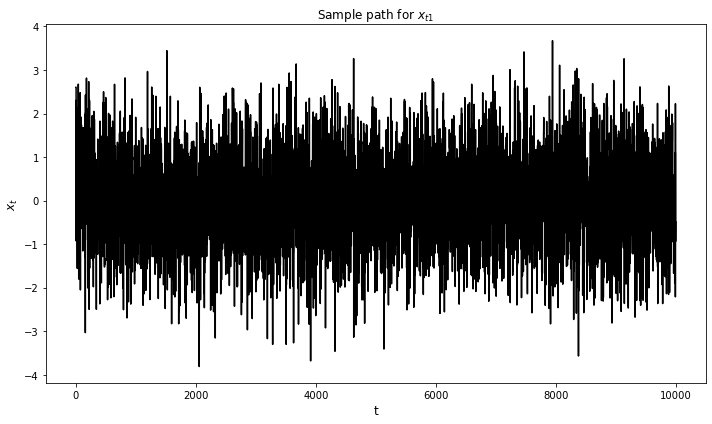

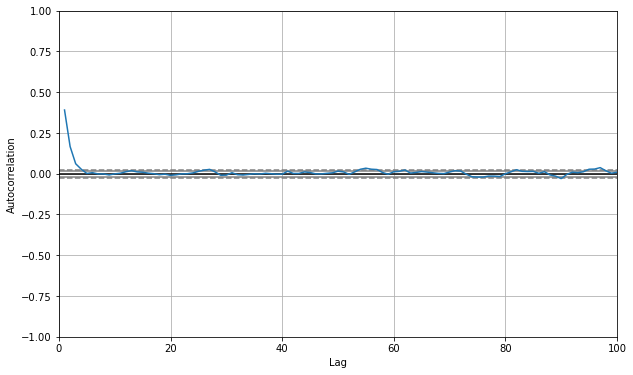

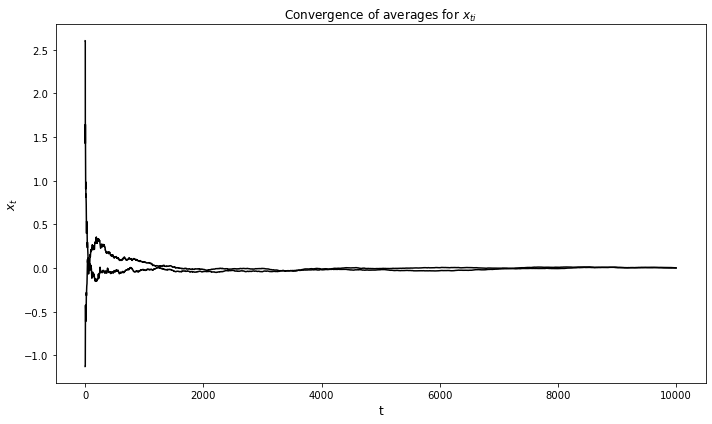

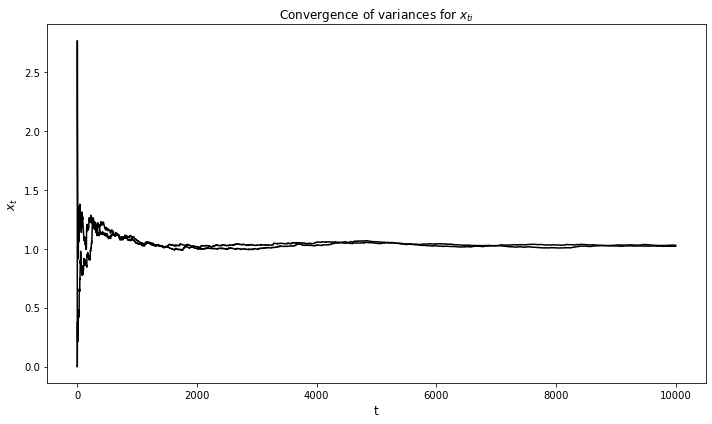

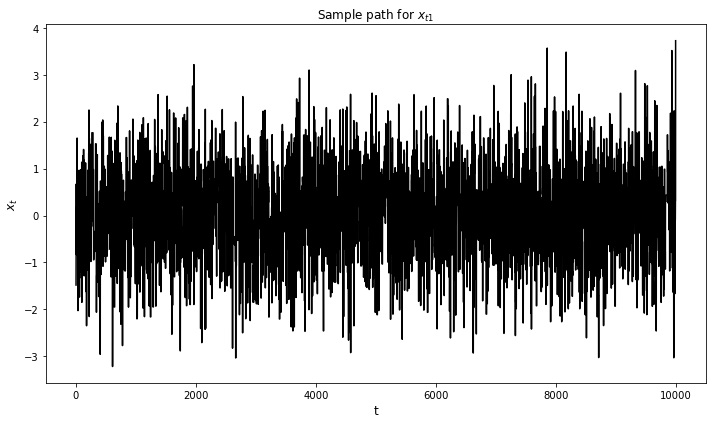

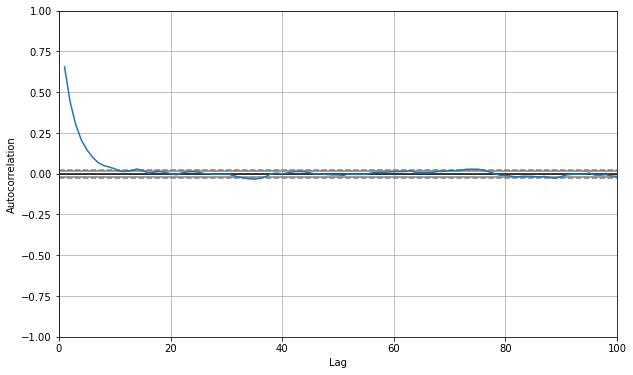

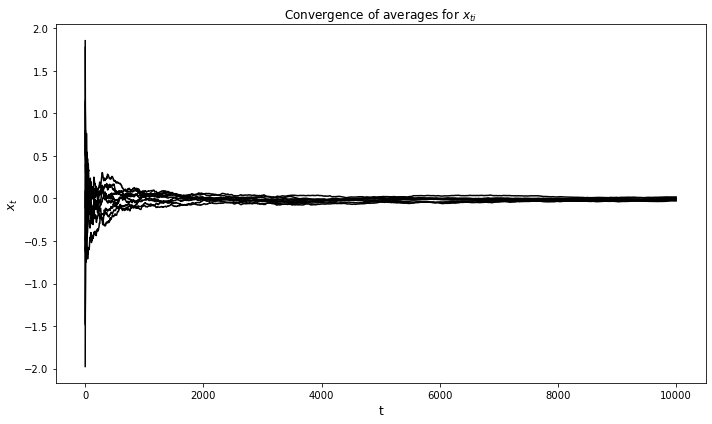

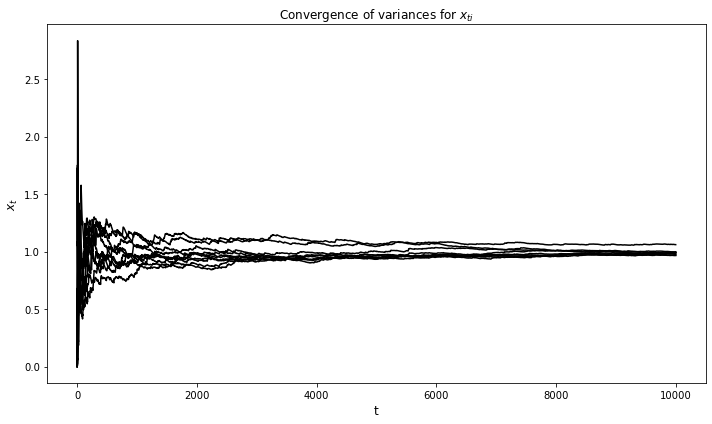

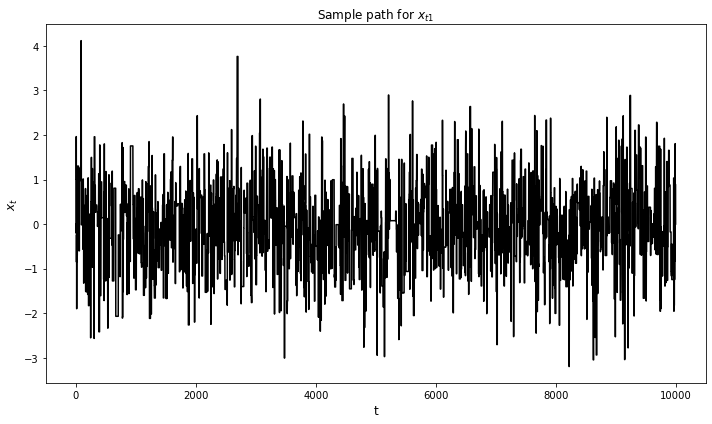

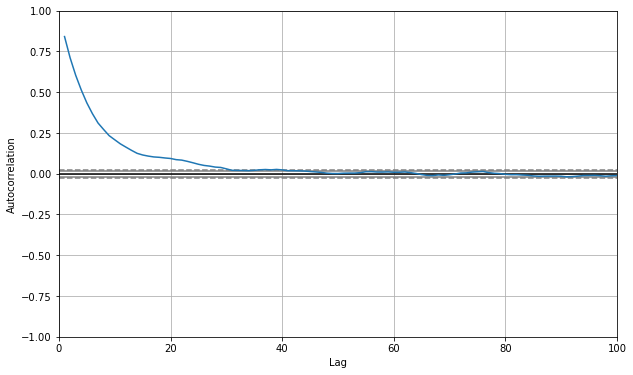

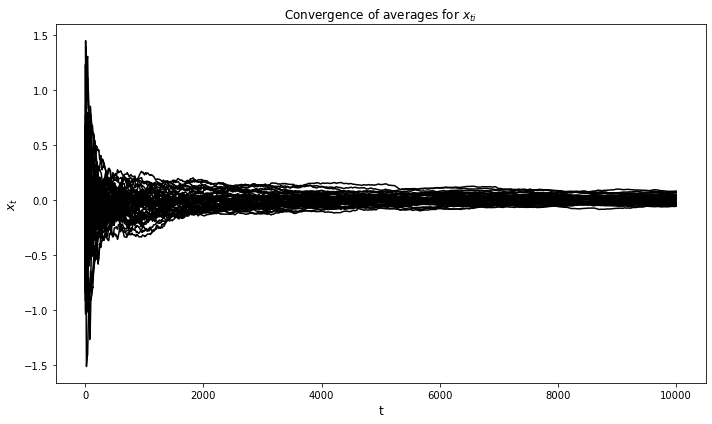

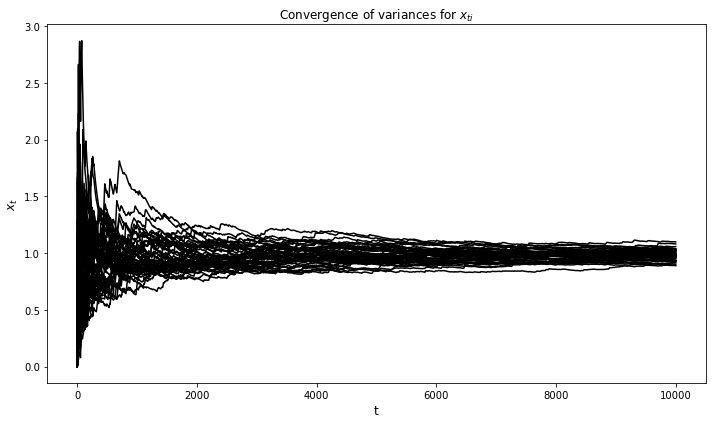

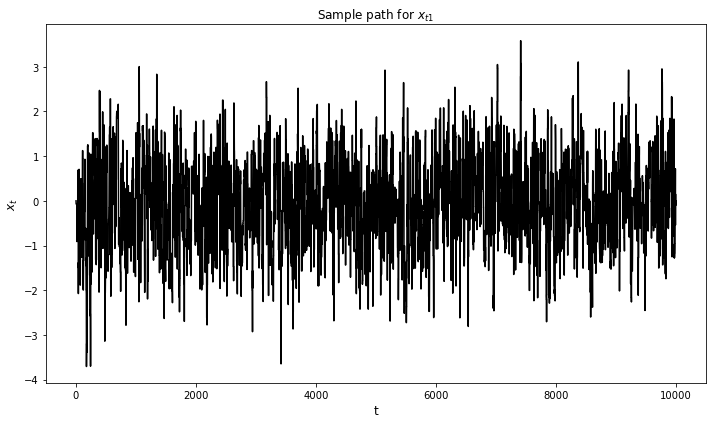

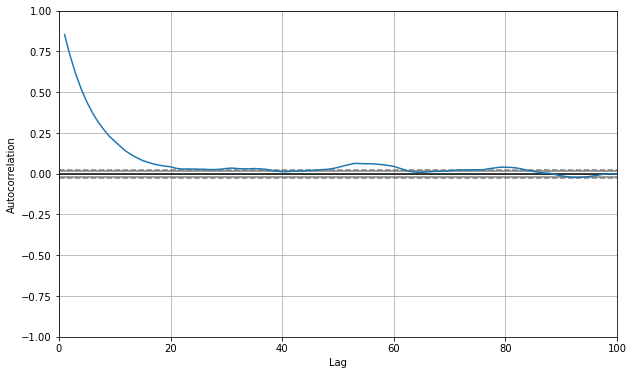

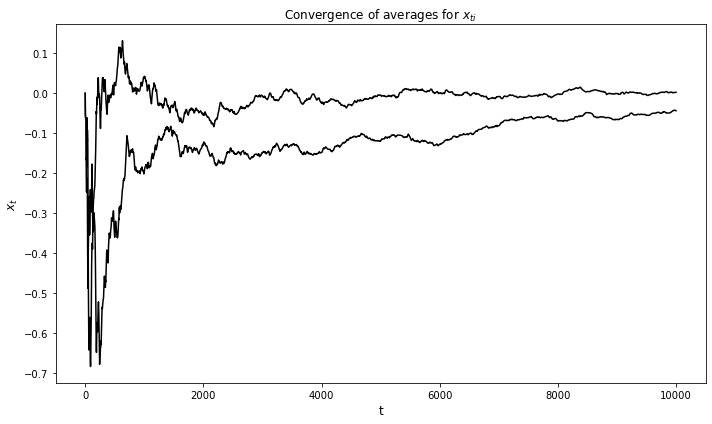

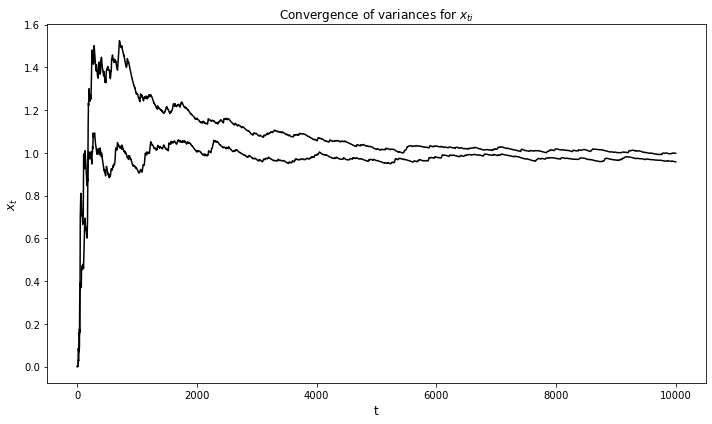

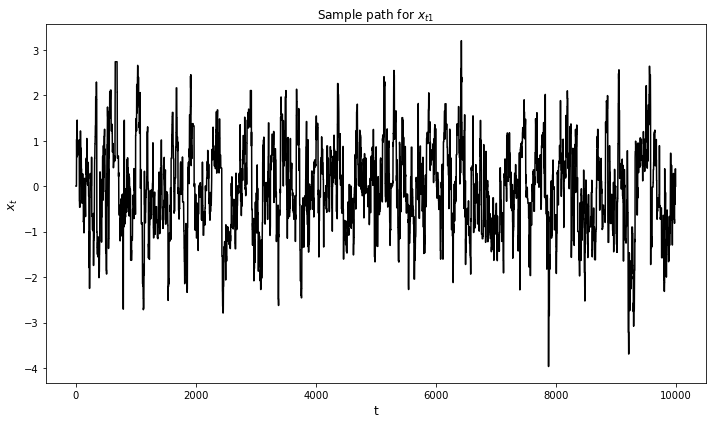

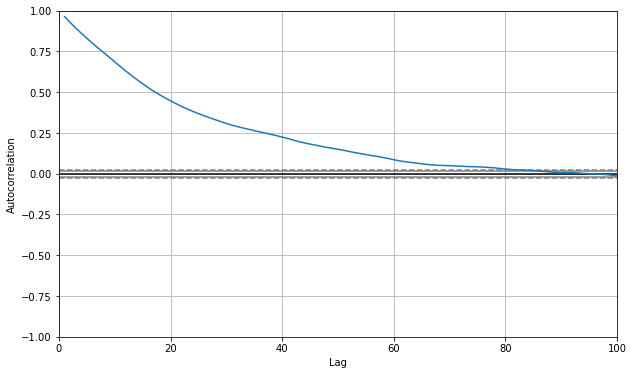

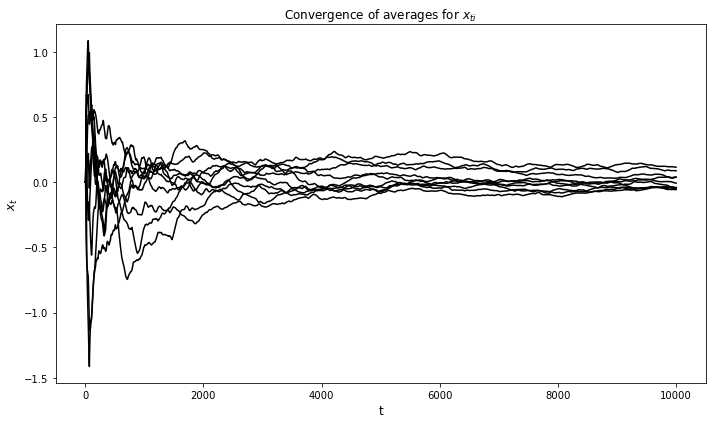

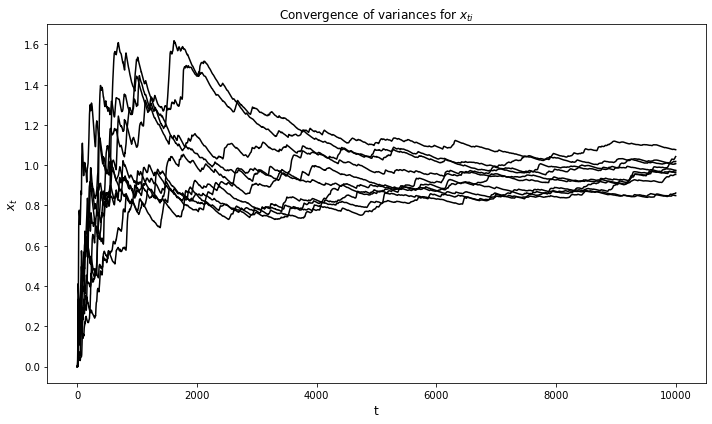

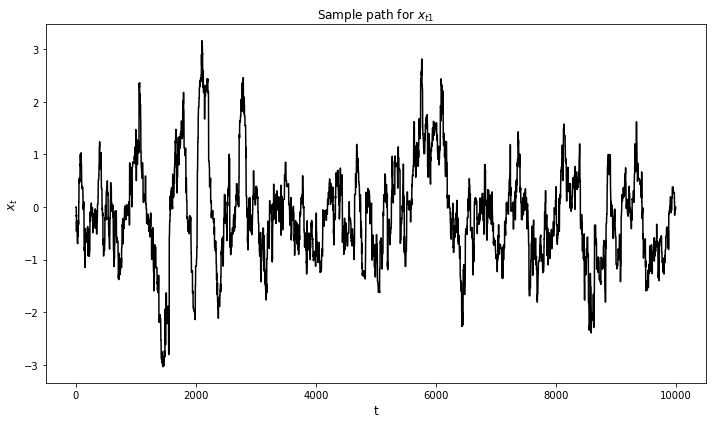

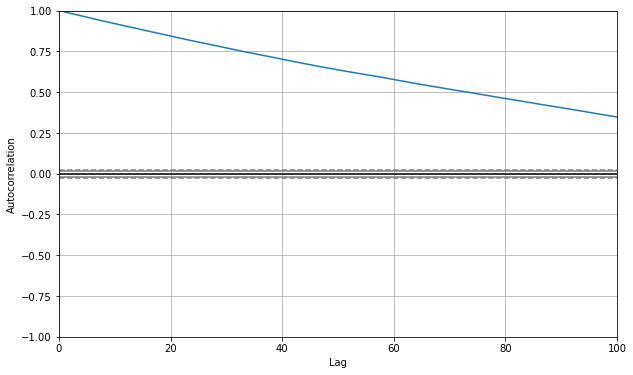

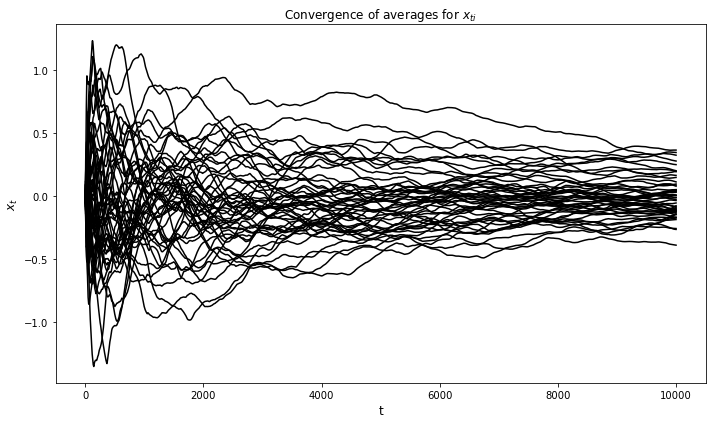

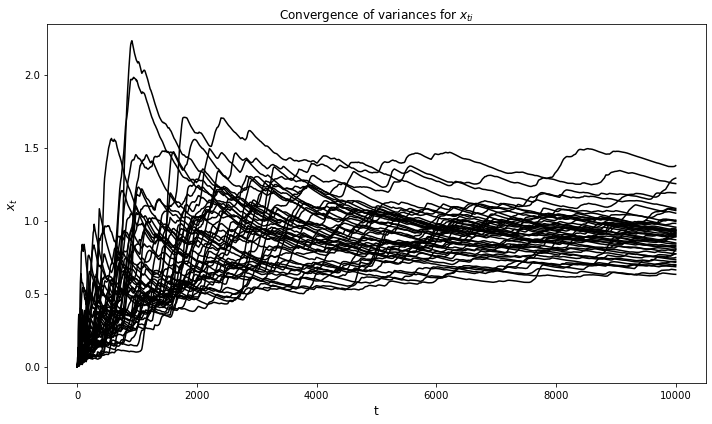

In [74]:
np.random.seed(2020)
N = 10000
D = (2, 10, 50) # Dimensions
T = 1 + np.arange(N) # For calculating averages
x_abs = 4
y_abs = 4
x_grid, y_grid = np.mgrid[-x_abs:x_abs:.01, -y_abs:y_abs:.01] # Grid for plotting
scales_ind_MH = 0.8
scales_rw_MH = (1.2, 0.3, 0.05)
mu = [np.zeros(D[d]) for d in range(len(D))] # Mean vector in std normal distribution
cov = [np.identity(D[d]) for d in range(len(D))] # Covariance matrix in std normal distribution
loc = [np.zeros(D[d]) for d in range(len(D))] # Mean vector in Cauchy distribution
shape_ind_MH = [scales_ind_MH * np.identity(D[d]) for d in range(len(D))] # Covariance matrix in Cauchy distribution for Ind
shape_rw_MH = [scales_rw_MH[d] * np.identity(D[d]) for d in range(len(D))] # Covariance matrix in Cauchy distribution for RW
x0 = [np.zeros(D[d]) for d in range(len(D))]
burn_in = 0
targets = [stats.multivariate_normal(mean=mu[d], cov=cov[d]) for d in range(len(D))]
proposals_ind_MH = [stats.multivariate_t(df=1, loc=loc[d], shape=shape_ind_MH[d]) for d in range(len(D))]
proposals_rw_MH = [stats.multivariate_t(df=1, loc=loc[d], shape=shape_rw_MH[d]) for d in range(len(D))]

# 2D, 10D, and 50D Ind MH
for i in range(len(D)):
    samples_ind_MH, ind_MH_accept_prob = naive_independent_metropolis_hastings_multivariate(x0[i], N, D[i], burn_in, targets[i], proposals_ind_MH[i])
    print(f"Ind MH Acceptance probability with D={D[i]}:", ind_MH_accept_prob)
    fig = trace_plot(samples_ind_MH[:, 0], r'Sample path for $x_{t1}$')
    fig = autocorrelation_plot(samples_ind_MH[:, 0], lags=100)
    # if D[i] == 2:
    #     fig = contour_plot(samples_ind_MH, x_grid, y_grid, targets[i], 'Independent MH contour plots for bivariate standard normal(0,I)')
    averages = [np.mean(samples_ind_MH[0:t, :], axis=0) for t in T]
    variances = [np.var(samples_ind_MH[0:t, :], axis=0) for t in T]
    fig = trace_plot(averages, r'Convergence of averages for $x_{ti}$')
    fig = trace_plot(variances, r'Convergence of variances for $x_{ti}$')

# 2D, 10D, and 50D RW MH
for i in range(len(D)):
    samples_rw_MH, rw_MH_accept_prob = naive_rw_metropolis_hastings_multivariate(x0[i], N, D[i], burn_in, targets[i], proposals_rw_MH[i])
    print(f"RW MH Acceptance probability with D={D[i]}:", rw_MH_accept_prob)
    fig = trace_plot(samples_rw_MH[:, 0], r'Sample path for $x_{t1}$')
    fig = autocorrelation_plot(samples_rw_MH[:, 0], lags=100)
    # if D[i] == 2:
    #     fig = contour_plot(samples_rw_MH, x_grid, y_grid, targets[i], 'Independent MH contour plots for bivariate standard normal(0,I)')
    averages = [np.mean(samples_rw_MH[0:t, :], axis=0) for t in T]
    variances = [np.var(samples_rw_MH[0:t, :], axis=0) for t in T]
    fig = trace_plot(averages, r'Convergence of averages for $x_{ti}$')
    fig = trace_plot(variances, r'Convergence of variances for $x_{ti}$')


### 2-dimensional and 5-dimensional mixture Gaussians as targets, Cauchy as proposals

Ind MH Acceptance probability with D=2: 0.2181
Ind MH Acceptance probability with D=5: 0.0254
RW MH Acceptance probability with D=2: 0.2928
RW MH Acceptance probability with D=5: 0.0366


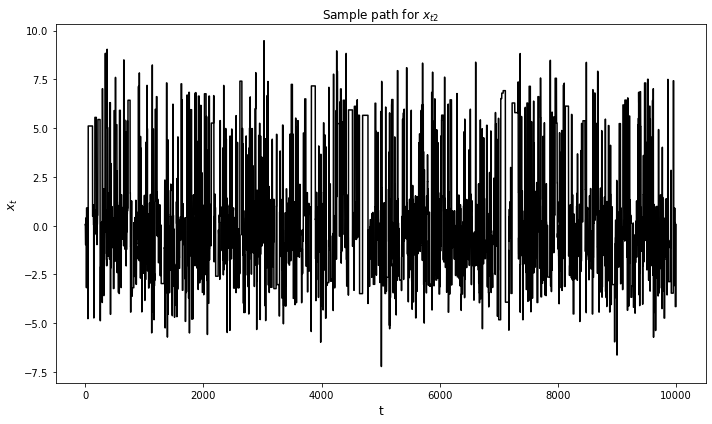

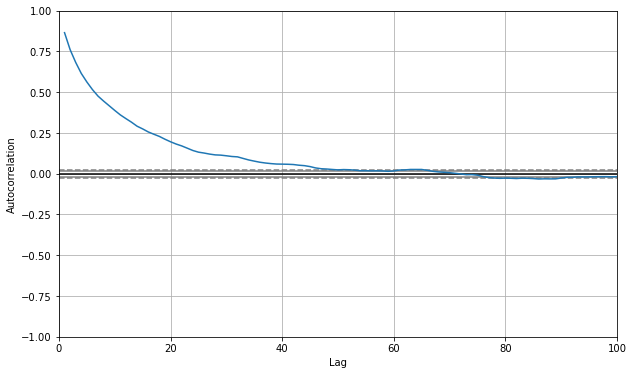

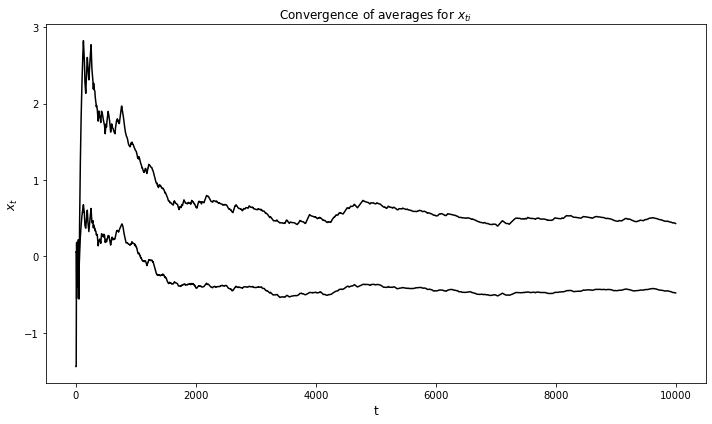

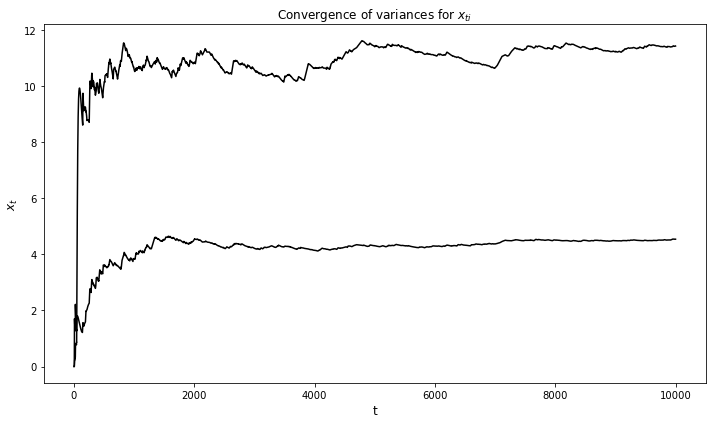

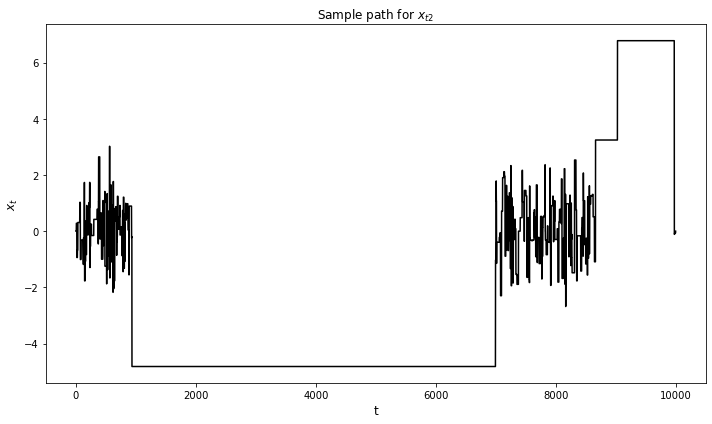

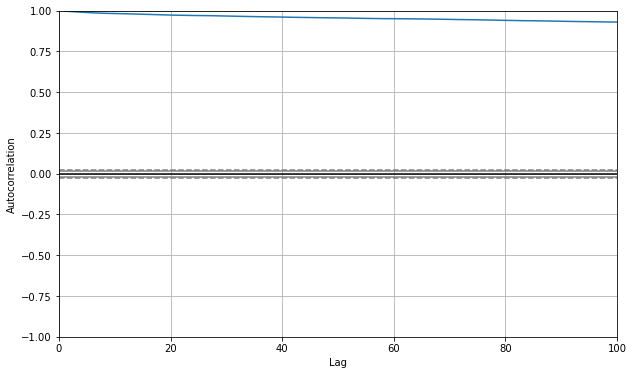

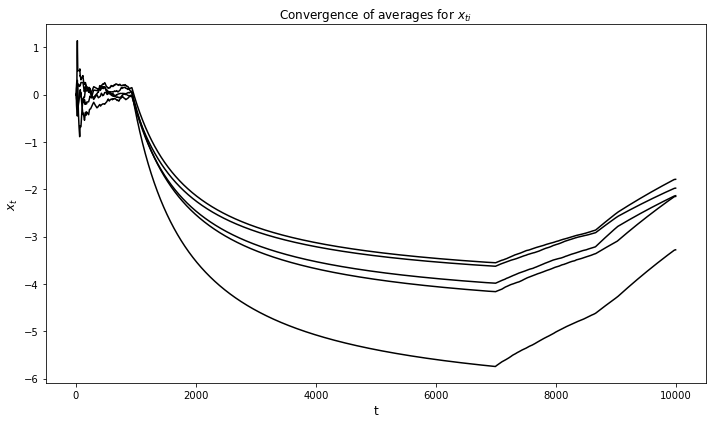

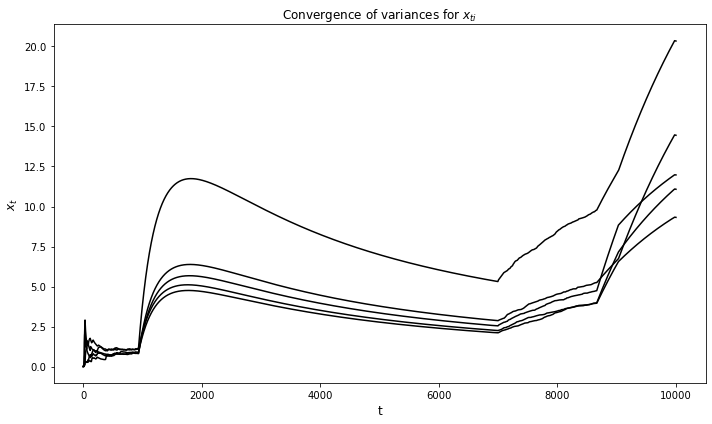

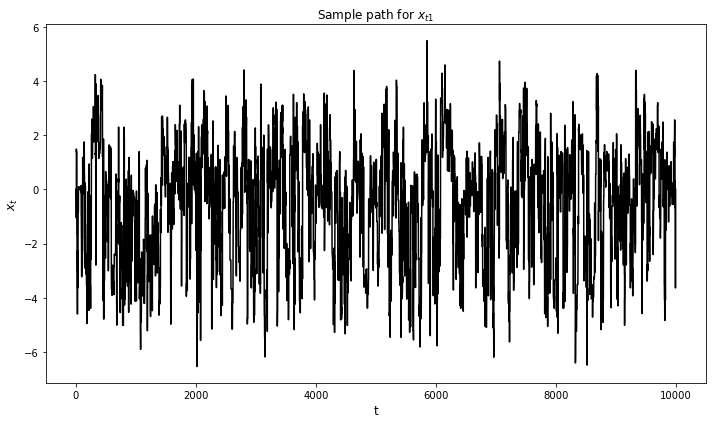

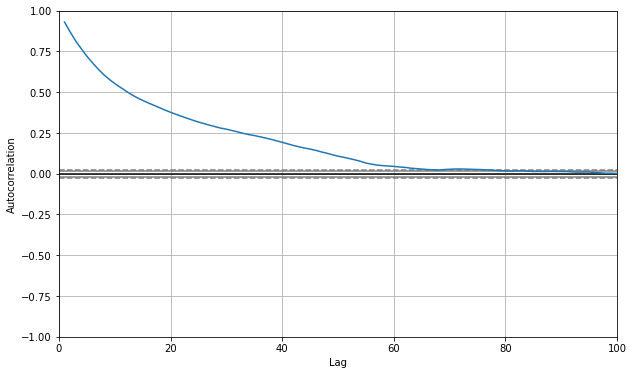

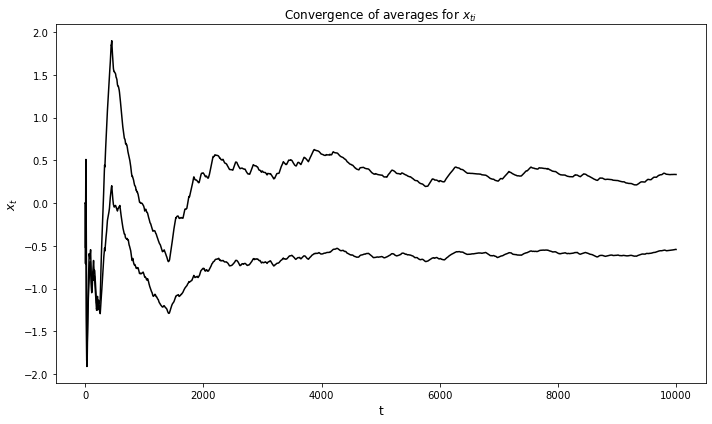

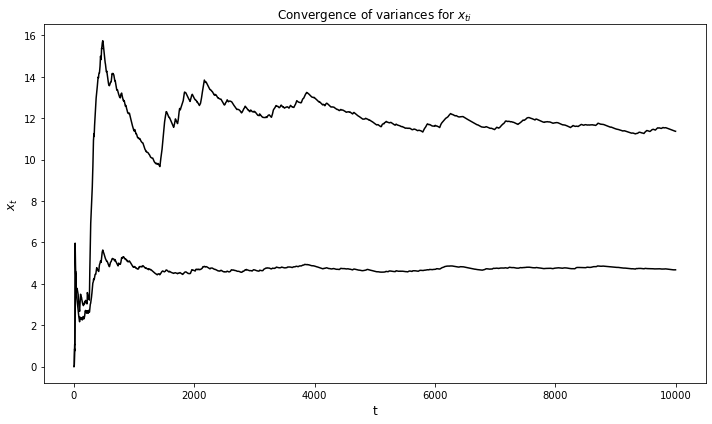

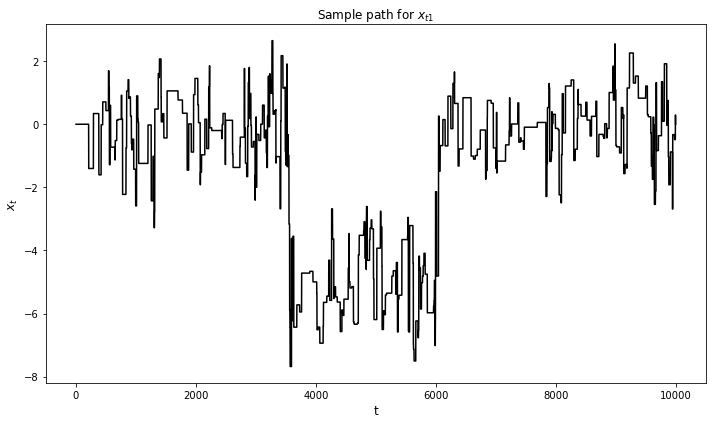

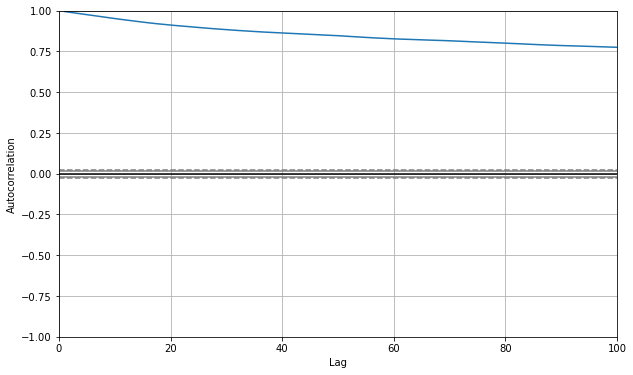

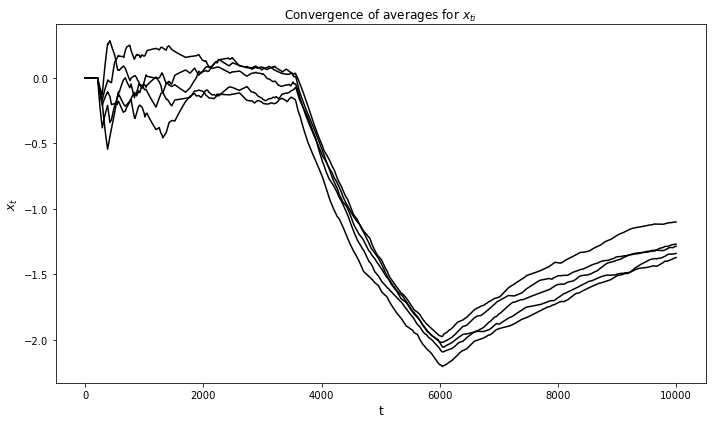

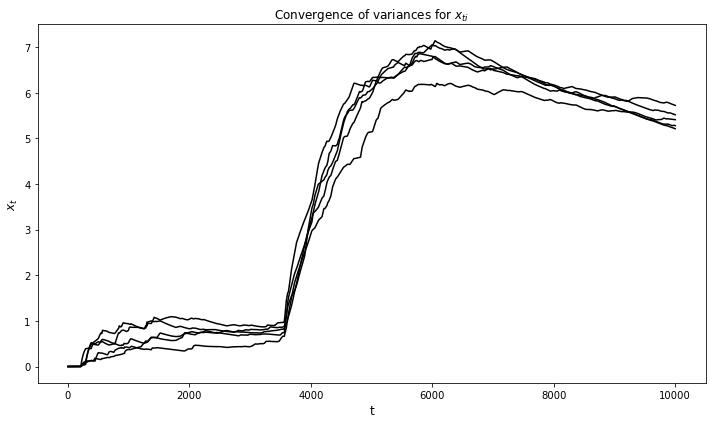

In [75]:
np.random.seed(2020)
N = 10000
D = (2, 5) # Dimensions
T = 1 + np.arange(N) # For calculating averages
scales_ind_MH = (7, 7)
scales_rw_MH = (3, 7) 
mu_2d = [np.zeros(D[0]), [2, 6], [-3, -3]] # Mean vector for first mixture component in 2D
mu_5d = [np.zeros(D[1]), 6 + np.zeros(D[1]), -5 + np.zeros(D[1])] # Mean vector for first mixture component in 2D
mu = [mu_2d, mu_5d]
cov = [np.identity(D[d]) for d in range(len(D))] # Covariance matrix in std normal distribution
targets = []
for i in range(len(mu)):
    rv1 = stats.multivariate_normal(mean=mu[i][0], cov=cov[i])
    rv2 = stats.multivariate_normal(mean=mu[i][1], cov=cov[i])
    rv3 = stats.multivariate_normal(mean=mu[i][2], cov=cov[i])
    if i == 0:
        targets.append(mixture_gaussian(rv1, rv2, rv3))
    else:
        targets.append(mixture_gaussian_5D(rv1, rv2, rv3))

# centroid = (1 / D[1]) * (mu_2d[0] + mu_2d[1] + mu_2d[2]) # Calculate the centroid and use this as best guess for center of mass in 10D
loc = [np.zeros(D[0]), np.zeros(D[1])] # Mean vector in Cauchy distribution
shape_ind_MH = [scales_ind_MH[d] * np.identity(D[d]) for d in range(len(D))] # Covariance matrix in Cauchy distribution for Ind
shape_rw_MH = [scales_rw_MH[d] * np.identity(D[d]) for d in range(len(D))] # Covariance matrix in Cauchy distribution for RW
x0 = [np.zeros(D[0]), np.zeros(D[1])]
burn_in = 0
proposals_ind_MH = [stats.multivariate_t(df=1, loc=loc[d], shape=shape_ind_MH[d]) for d in range(len(D))]
proposals_rw_MH = [stats.multivariate_t(df=1, loc=loc[d], shape=shape_rw_MH[d]) for d in range(len(D))]

# 2D, 5D Ind MH
for i in range(len(D)):
    samples_ind_MH, ind_MH_accept_prob = naive_independent_metropolis_hastings_multivariate(x0[i], N, D[i], burn_in, targets[i], proposals_ind_MH[i])
    print(f"Ind MH Acceptance probability with D={D[i]}:", ind_MH_accept_prob)
    fig = trace_plot(samples_ind_MH[:, 1], r'Sample path for $x_{t2}$')
    fig = autocorrelation_plot(samples_ind_MH[:, 1], lags=100)
    averages = [np.mean(samples_ind_MH[0:t, :], axis=0) for t in T]
    variances = [np.var(samples_ind_MH[0:t, :], axis=0) for t in T]
    fig = trace_plot(averages, r'Convergence of averages for $x_{ti}$')
    fig = trace_plot(variances, r'Convergence of variances for $x_{ti}$')

# 2D, 5D RW MH
for i in range(len(D)):
    samples_rw_MH, rw_MH_accept_prob = naive_rw_metropolis_hastings_multivariate(x0[i], N, D[i], burn_in, targets[i], proposals_rw_MH[i])
    print(f"RW MH Acceptance probability with D={D[i]}:", rw_MH_accept_prob)
    fig = trace_plot(samples_rw_MH[:, 0], r'Sample path for $x_{t1}$')
    fig = autocorrelation_plot(samples_rw_MH[:, 0], lags=100)
    averages = [np.mean(samples_rw_MH[0:t, :], axis=0) for t in T]
    variances = [np.var(samples_rw_MH[0:t, :], axis=0) for t in T]
    fig = trace_plot(averages, r'Convergence of averages for $x_{ti}$')
    fig = trace_plot(variances, r'Convergence of variances for $x_{ti}$')

# Computational efficiency in univariate setting

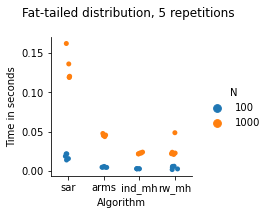

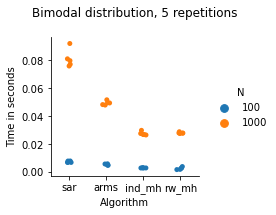

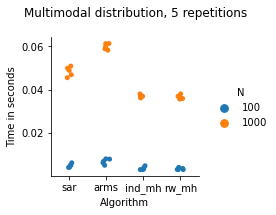

In [80]:
"""Illustrated with N=(100, 1000) as N=(100, 1000, 10000) takes a long time to run"""
np.random.seed(2020)

# Initialize
n_rep = 5 # Number of repetitions
N = (100, 1000) # Set of sample lengths
burn_in = 0

targets = [fat_tailed_distribution_unnormalized(), unnormalized_bimodal_distribution(), unnormalized_multimodal_distribution()]
target_name = ['Fat-tailed distribution', 'Bimodal distribution', 'Multimodal distribution']

# Simple AR
M = [68, 11.2, 33]
proposals_simple = [Cauchy(0.49, 10.78), Normal(7.45, 5.7), Normal(0, 1.1)]

# ARMS parameters
log_probs = [log_unnorm_fattailed, log_unnorm_bimodal(), log_unnorm_multimodal()]
T_k = [np.array([-4, 0., 1.6]), np.array([-3., 6., 13.]), np.array([-2.4, 2.4])]
z_limits=[float('-inf'), float('inf')]
x0_arms = [0., 0., 0.]

# MH Parameters
x0_MH = [0., 0., 0.]

# Independent MH
proposals_ind_MH = [Cauchy(-8, 11), Normal(7.1, 5.1), Normal(0, 1)]

# Random Walk MH
proposals_rw_MH = [Cauchy(-8, 30), Normal(7.1, 9.5), Normal(0, 2)]

for i in range(len(targets)):
    ax, mean_df = computational_efficiency_univariate1(N, n_rep, targets[i], target_name[i], proposals_simple[i], M[i], proposals_ind_MH[i], proposals_rw_MH[i],
                                                     log_probs[i], T_k[i], z_limits, x0_arms[i], x0_MH[i], burn_in, latex_table=False)

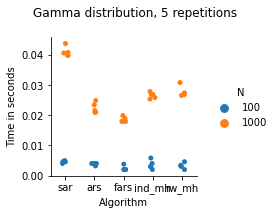

In [81]:
"""Illustrated with N=(100, 1000) as N=(100, 1000, 10000) takes a long time to run"""
np.random.seed(2020)

# Initialize
n_rep = 5 # Number of repetitions
N = (100, 1000) # Set of sample lengths
a = 8.95 # Parameter in gamma distribution
beta = 2 # Parameter in gamma distribution
theta = 0.5 # 1/beta
burn_in = 0

target = Gamma(a, beta)
target_name = 'Gamma distribution'

# Simple AR
M = 1.18
proposal_simple = proposal = Logistic(4.07, 1.03)

# ARS parameters
log_probs = log_unnorm_gamma(a, theta)
T_k_ars = np.array([2.4, 4., 7.])
z_limits = [0., float('inf')] # Bounds in set for intersection points

# FARS
T_k_fars = np.array([1., 2., 3., 4., 4.7, 5.5, 8.]) # Initial abscissae

# Define how to compute h(x) and h'(x)
log_prob = log_unnorm_gamma(a, theta)

# MH Parameters
x0_MH = 4.

# Independent MH
proposal_ind_MH = Logistic(4.07, 1.03)

# Random Walk MH
proposal_rw_MH = Logistic(4.07, 2)

# Computational efficiency
ax, mean_df = computational_efficiency_univariate2(N, n_rep, target, target_name, proposal_simple, M, proposal_ind_MH, proposal_rw_MH,
                                                     log_prob, T_k_ars, T_k_fars, z_limits, x0_MH, burn_in, latex_table=False)

# Computational efficiency in multivariate setting

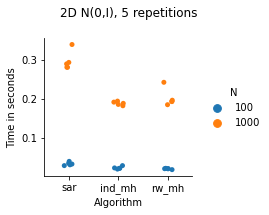

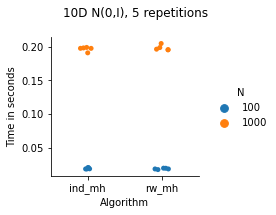

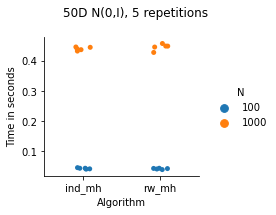

In [82]:
"""Illustrated with N=(100, 1000) as N=(100, 1000, 10000) takes a long time to run"""
np.random.seed(2020)

# Initialize
n_rep = 5 # Number of repetitions
N = (100, 1000) # Set of sample lengths
D = (2, 10, 50) # Dimensions
M = 2
T = [1 + np.arange(n) for n in N] # For calculating averages
scales_ind_MH = 0.8
scales_rw_MH = (1.2, 0.3, 0.05)
mu = [np.zeros(D[d]) for d in range(len(D))] # Mean vector in std normal distribution
cov = [np.identity(D[d]) for d in range(len(D))] # Covariance matrix in std normal distribution
loc = [np.zeros(D[d]) for d in range(len(D))] # Mean vector in Cauchy distribution
shape_ind_MH = [scales_ind_MH * np.identity(D[d]) for d in range(len(D))] # Covariance matrix in Cauchy distribution for Ind
shape_rw_MH = [scales_rw_MH[d] * np.identity(D[d]) for d in range(len(D))] # Covariance matrix in Cauchy distribution for RW
x0 = [np.zeros(D[d]) for d in range(len(D))]
burn_in = 0
targets = [stats.multivariate_normal(mean=mu[d], cov=cov[d]) for d in range(len(D))]
target_name = ['2D N(0,I)', '10D N(0,I)', '50D N(0,I)']
proposals_ind_MH = [stats.multivariate_t(df=1, loc=loc[d], shape=shape_ind_MH[d]) for d in range(len(D))]
proposals_rw_MH = [stats.multivariate_t(df=1, loc=loc[d], shape=shape_rw_MH[d]) for d in range(len(D))]
proposal_simple = stats.multivariate_t(loc=loc[0], shape=cov[0], df=1)

# Computational efficiency
for i in range(len(D)):
    ax, mean_df = computational_efficiency_multivariate(N, n_rep, D[i], targets[i], target_name[i], proposal_simple, M, proposals_ind_MH[i], proposals_rw_MH[i],
                                                     x0[i], burn_in, latex_table=False)